In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
location_ids = [179,
 163,
 214,
 161,
 165,
 190,
 189,
 196,
 201,
 180,
 15,
 164,
 20,
 202,
 205,
 171,
 11,
 184,
 168,
 6,
 141,
 207,
 181,
 213,
 522]

# Impact

In [3]:
folic_acid_total_dalys = pd.read_pickle('results_raw/folic_acid_dalys')

In [4]:
folic_acid = pd.read_pickle('results_raw/folic_acid_waterfall_salt.pkl')
folic_acid['nutrient'] = 'folic acid'

In [5]:
iron_bw_250 = pd.read_csv('results_raw/iron_bw_results.csv')
    # read in zero fortification results for wheat flour and maize
iron_bw_250_zero = pd.read_csv('results_raw/iron_bw_results_zero_2021_04_14.csv')
iron_bw_250_zero['coverage_level'] = 1
    # duplicate zero wheat flour for zero industry wheat flour because they are the same data
iron_bw_250_zero = pd.read_csv('results_raw/iron_bw_results_zero_2021_04_14.csv')
iron_bw_250_zero['coverage_level'] = 1
iron_bw_250_zero_wheat = iron_bw_250_zero.loc[iron_bw_250_zero.vehicle=='zero wheat flour']
iron_bw_250_zero_wheat['vehicle'] = 'zero industry wheat'
iron_bw_250_zero = pd.concat([iron_bw_250_zero, iron_bw_250_zero_wheat], ignore_index=True, sort=True)

    # read in industry wheat flour data
iron_bw_250_wheat = pd.read_csv('results_raw/iron_bw_results_industry_wheat_2021_04_15.csv')
iron_bw_250 = pd.concat([iron_bw_250, 
                         iron_bw_250_wheat,
                         iron_bw_250_zero], ignore_index=True, sort=True)

iron_bw_250 = iron_bw_250.set_index(['location_id', 'measure', 'vehicle','coverage_level']).stack().reset_index()

iron_bw_1000 = (pd.concat([iron_bw_250, iron_bw_250, iron_bw_250, iron_bw_250], ignore_index=True)
                .rename(columns={'level_4':'draw',0:'value'})
                .set_index(['location_id','measure','vehicle','coverage_level'])
                .sort_index())
draws = []
for i in list(range(0,1000)):
    draws.append(f'draw_{i}')
iron_bw_1000['draw'] = draws * int(len(iron_bw_1000) / 1000)
iron_bw_1000 = iron_bw_1000.reset_index()
iron_bw_1000 = iron_bw_1000.pivot_table(index=['location_id', 'measure', 'vehicle','coverage_level'],
                                       columns='draw', values='value').reset_index()
iron_bw_1000['year'] = 2025
iron_bw_1000['nutrient'] = 'iron'

iron_bw_1000 = (iron_bw_1000.set_index(['location_id', 'vehicle', 'coverage_level', 'year', 'measure'])
               .drop(columns='nutrient')
                .sort_index())

iron_bw_1000.head()

draw                                                                draw_0  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  5272.011695   
                                               pif                0.177321   
                                               rates_averted      6.847575   
                           0.5            2025 counts_averted  6439.973114   
                                               pif                0.216605   

draw                                                                draw_1  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  1883.106801   
                                               pif                0.061071   
                                               rates_averted      2.439305   
                           0.5            2025 counts_averted  2293.029855   
                                               pif                0.074365   

draw                                                               draw_10  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  2225.781747   
                                               pif                0.082930   
                                               rates_averted      2.639266   
                           0.5            2025 counts_averted  2763.342705   
                                               pif                0.102959   

draw                                                              draw_100  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  4091.632163   
                                               pif                0.131400   
                                               rates_averted      5.659770   
                           0.5            2025 counts_averted  4925.127693   
                                               pif                0.158168   

draw                                                              draw_101  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  2280.219734   
                                               pif                0.072219   
                                               rates_averted      2.736006   
                           0.5            2025 counts_averted  2832.952811   
                                               pif                0.089725   

draw                                                              draw_102  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  5065.137185   
                                               pif                0.166774   
                                               rates_averted      5.979867   
                           0.5            2025 counts_averted  6235.049115   
                                               pif                0.205294   

draw                                                              draw_103  \
location_id vehicle        coverage_level year measure                       
6           industry wheat 0.2            2025 counts_averted  3134.381818   
                                               pif                0.106181   
                                               rates_averted      4.268250   
                           0.5            2025 counts_averted  3922.999312   
                                               pif                0.132897   

draw                                                              draw_104  \
location_id vehicle        coverage_level year measure                       
6           ind

In [6]:
iron_u5 = pd.read_pickle('results_raw/iron_u5.pkl')
iron_wra = pd.read_pickle('results_raw/iron_wra.pkl')
iron = (iron_u5.set_index([c for c in iron_u5.columns if 'draw' not in c])
        + iron_wra.set_index([c for c in iron_u5.columns if 'draw' not in c])).reset_index()
iron = iron.loc[iron.vehicle!='industry wheat'].loc[iron.vehicle!='zero industry wheat']
iron_u5_industry = pd.read_pickle('results_raw/iron_u5_industry_wheat_update.pkl')
iron_wra_industry = pd.read_pickle('results_raw/iron_wra_industry_wheat_update.pkl')
iron_industry = (iron_u5_industry.set_index([c for c in iron_u5_industry.columns if 'draw' not in c])
        + iron_wra_industry.set_index([c for c in iron_u5_industry.columns if 'draw' not in c])).reset_index()
iron = (pd.concat([iron, iron_industry], ignore_index=True)
        .set_index(['location_id','vehicle','coverage_level','year','measure'])
        .sort_index())#.reset_index()

iron = (iron + iron_bw_1000).reset_index()
#iron = iron_bw_1000.reset_index()
iron['nutrient'] = 'iron'
iron.head()

draw,location_id,vehicle,coverage_level,year,measure,draw_0,draw_1,draw_10,draw_100,draw_101,...,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,nutrient
0,6,industry wheat,0.2,2025,counts_averted,51673.405251,19549.226666,19043.571603,19450.892758,44994.207940,...,27339.289394,69389.515578,60546.456023,18629.879044,29792.368807,49206.056819,21380.520946,23394.936407,25758.534147,iron
1,6,industry wheat,0.2,2025,pif,7.797253,2.859420,4.034359,2.580310,8.345024,...,4.010431,8.699419,10.177575,2.638738,5.417385,16.020701,3.575546,4.841922,4.183111,iron
2,6,industry wheat,0.2,2025,rates_averted,21.448323,7.769530,7.796872,10.588757,15.771744,...,11.222390,23.807823,21.799292,8.782698,11.505288,16.822807,9.197649,8.921448,11.349719,iron
3,6,industry wheat,0.5,2025,counts_averted,118393.738512,45908.191122,44203.175877,42903.608041,106488.767966,...,62958.761284,162792.582202,142365.544931,41844.667447,70875.962340,116341.532509,49895.463751,55194.641743,59581.843232,iron
4,6,industry wheat,0.5,2025,pif,18.620829,6.983733,9.840817,6.215665,20.170992,...,9.715831,20.813438,24.391102,6.401204,13.184737,38.668411,8.749146,11.829280,10.182059,iron


In [7]:
# exclude old industry wheat flour results
iron_u5 = pd.read_pickle('results_raw/iron_u5.pkl')
iron_u5['nutrient'] = 'iron'
iron_wra = pd.read_pickle('results_raw/iron_wra.pkl')
iron_wra['nutrient'] = 'iron'
iron_no_bw = (iron_u5.set_index([c for c in iron_u5.columns if 'draw' not in c])
        + iron_wra.set_index([c for c in iron_u5.columns if 'draw' not in c])).reset_index()
iron_no_bw = iron_no_bw.loc[iron_no_bw.vehicle!='industry wheat'].loc[iron_no_bw.vehicle!='zero industry wheat']

# read in new industry wheat results
iron_u5_industry = pd.read_pickle('results_raw/iron_u5_industry_wheat_update.pkl')
iron_u5_industry['nutrient'] = 'iron'
iron_wra_industry = pd.read_pickle('results_raw/iron_wra_industry_wheat_update.pkl')
iron_wra_industry['nutrient'] = 'iron'
iron_industry = (iron_u5_industry.set_index([c for c in iron_u5_industry.columns if 'draw' not in c])
        + iron_wra_industry.set_index([c for c in iron_u5_industry.columns if 'draw' not in c])).reset_index()

iron_no_bw = pd.concat([iron_no_bw, iron_industry], ignore_index=True, sort=True)
iron_no_bw['nutrient'] = 'iron'
iron_no_bw.head()

draw,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,measure,nutrient,vehicle,year
0,0.2,7.637104,2.594938,4.244068,2.600310,9.917857,7.415747,1.359985,9.339937,2.098922,...,5.995712,19.516659,3.225155,5.609841,4.508586,6,pif,iron,wheat flour,2025
1,0.5,18.444249,6.412946,10.447877,6.427747,23.931951,17.973933,3.378713,22.596008,5.196005,...,14.621292,46.863803,7.979410,13.760003,11.118319,6,pif,iron,wheat flour,2025
2,0.8,28.518511,10.143435,16.462191,10.169190,36.971948,27.888751,5.372214,34.994941,8.232532,...,22.823962,72.057968,12.635163,21.603147,17.548336,6,pif,iron,wheat flour,2025
3,1.0,34.851665,12.582768,20.369321,12.616610,45.156683,34.160031,6.687347,42.810254,10.223791,...,28.067523,87.742360,15.685192,26.667029,21.737397,6,pif,iron,wheat flour,2025
4,0.2,-1.054964,-0.352196,-0.577747,-0.352869,-1.371197,-1.021647,-0.183859,-1.288579,-0.284504,...,-0.822127,-2.709054,-0.437354,-0.765872,-0.612949,6,pif,iron,zero wheat flour,2025


In [8]:
pop_u5 = (get_population(location_id=location_ids,
                     year_id=2019,
                     sex_id=[1,2],
                     age_group_id=[2,3,4,5],
                     gbd_round_id=6,
                     decomp_step='step4')
       .groupby('location_id')
       .sum()
       .filter(['population']))
pop_wra = (get_population(location_id=location_ids,
                     year_id=2019,
                     sex_id=2,
                     age_group_id=list(range(7,16)),
                     gbd_round_id=6,
                     decomp_step='step4')
       .groupby('location_id')
       .sum()
       .filter(['population']))
pop_tot = pop_u5 + pop_wra
frac_u5 = pop_u5 / pop_tot
frac_wra = pop_wra / pop_tot

# population weight rates
index_cols = ['location_id','vehicle','coverage_level','year','measure','nutrient']

iron_u5_rate = (pd.concat([(iron_u5.loc[iron_u5.measure=='rates_averted']
                .loc[iron_u5.vehicle!='industry wheat']
                .loc[iron_u5.vehicle!='zero industry wheat']),
                           iron_u5_industry.loc[iron_u5_industry.measure=='rates_averted']], ignore_index=True))
iron_bw_rate = iron_bw_1000.reset_index().loc[iron_bw_1000.reset_index().measure=='rates_averted']
iron_bw_rate['nutrient'] = 'iron'
iron_wra_rate = pd.concat([(iron_wra.loc[iron_wra.measure=='rates_averted']
                .loc[iron_wra.vehicle!='industry wheat']
                .loc[iron_wra.vehicle!='zero industry wheat']),
                           iron_wra_industry.loc[iron_wra_industry.measure=='rates_averted']], ignore_index=True)

iron_u5_bw_rate = (iron_u5_rate.set_index(index_cols) + iron_bw_rate.set_index(index_cols)).reset_index()
iron_u5_bw_rate = iron_u5_bw_rate.merge(frac_u5, on='location_id')
iron_wra_rate = iron_wra_rate.merge(frac_wra, on='location_id')

for i in list(range(0,1000)):
    iron_u5_bw_rate[f'draw_{i}'] = iron_u5_bw_rate[f'draw_{i}'] * iron_u5_bw_rate['population']
    iron_wra_rate[f'draw_{i}'] = iron_wra_rate[f'draw_{i}'] * iron_wra_rate['population']
    
iron_weighted_rate = (iron_u5_bw_rate.drop(columns='population').set_index(index_cols)
                     + iron_wra_rate.drop(columns='population').set_index(index_cols))

# weighted PIFs
    # do not include BW results here
wra_ira_dalys = pd.read_pickle('results_raw/wra_ira_dalys.pkl')
wra_maternal_dalys = pd.read_pickle('results_raw/iron_maternal_dalys.pkl')
u5_iron_dalys = pd.read_pickle('results_raw/u5_ira_dalys.pkl')
tot_iron_dalys = wra_ira_dalys + wra_maternal_dalys + u5_iron_dalys

iron_u5_counts = (pd.concat([(iron_u5.loc[iron_u5.measure=='counts_averted']
                .loc[iron_u5.vehicle!='industry wheat']
                .loc[iron_u5.vehicle!='zero industry wheat']),
                           iron_u5_industry.loc[iron_u5_industry.measure=='counts_averted']], ignore_index=True)
                  .set_index(index_cols))
iron_bw_1000['nutrient'] = 'iron'
iron_bw_counts = iron_bw_1000.reset_index().loc[iron_bw_1000.reset_index().measure=='counts_averted'].set_index(index_cols)
iron_wra_counts = (pd.concat([(iron_wra.loc[iron_wra.measure=='counts_averted']
                .loc[iron_wra.vehicle!='industry wheat']
                .loc[iron_wra.vehicle!='zero industry wheat']),
                           iron_wra_industry.loc[iron_wra_industry.measure=='counts_averted']], 
                             ignore_index=True).set_index(index_cols))

tot_iron_counts = iron_u5_counts + iron_bw_counts + iron_wra_counts

# currently excluding birth weight DALYs averted from PIF calculations
tot_iron_pifs = ((iron_u5_counts + iron_wra_counts) / tot_iron_dalys * 100).reset_index()
#tot_iron_pifs = (tot_iron_counts / tot_iron_dalys * 100).reset_index()
tot_iron_pifs['measure'] = 'pif'
tot_iron_pifs = tot_iron_pifs.set_index(index_cols)

iron = pd.concat([tot_iron_pifs,
                 iron_weighted_rate,
                 tot_iron_counts], sort=True).reset_index()
iron.head()

draw,location_id,vehicle,coverage_level,year,measure,nutrient,draw_0,draw_1,draw_10,draw_100,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,6,wheat flour,0.2,2025,pif,iron,4.273098,1.499674,2.367924,1.497847,...,2.838944,2.561471,5.642691,6.232544,1.285229,3.306057,10.801740,1.761949,3.128894,2.425758
1,6,wheat flour,0.5,2025,pif,iron,10.308970,3.705875,5.828385,3.701164,...,6.970467,6.271554,13.544243,14.946608,3.183730,8.055105,25.922790,4.358246,7.678418,5.980710
2,6,wheat flour,0.8,2025,pif,iron,15.922219,5.861079,9.181991,5.853308,...,10.954042,9.828430,20.813029,22.948970,5.047528,12.562863,39.831309,6.899512,12.060474,9.437411
3,6,wheat flour,1.0,2025,pif,iron,19.443430,7.270084,11.359919,7.260175,...,13.529928,12.117470,25.329969,27.915111,6.271058,15.439779,48.475319,8.563621,14.891592,11.688488
4,6,zero wheat flour,0.2,2025,pif,iron,-0.590727,-0.203554,-0.322380,-0.203319,...,-0.387228,-0.350159,-0.783150,-0.865566,-0.174123,-0.453624,-1.499857,-0.238975,-0.426995,-0.329838


In [9]:
vehicles = ['zero maize flour', 'maize flour', 'zero industry wheat',
       'industry wheat', 'zero wheat flour', 'wheat flour',
       'zero industry salt', 'industry salt', 'zero salt', 'salt',
           'oil','industry oil','zero oil','zero industry oil']

In [10]:
vitamin_a_no_oil = pd.read_pickle('results_raw/vitamin_a.pkl')
vitamin_a_no_oil = vitamin_a_no_oil.loc[vitamin_a_no_oil.vehicle.isin([v for v in vehicles if 'oil' not in v])]
vitamin_a_oil = pd.read_pickle('results_raw/vitamin_a_oil_update.pkl')
vitamin_a = pd.concat([vitamin_a_no_oil, vitamin_a_oil], ignore_index=True)
vitamin_a['nutrient'] = 'vitamin a'
vitamin_a.head()

draws,location_id,year,vehicle,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,...,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,measure,nutrient
0,6,2021,industry wheat,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a
1,6,2021,industry wheat,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a
2,6,2021,industry wheat,0.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a
3,6,2021,industry wheat,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a
4,6,2021,wheat flour,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pif,vitamin a


In [11]:
zinc = pd.read_pickle('results_raw/zinc.pkl')
zinc['nutrient'] = 'zinc'
zinc_prev = pd.read_pickle('results_raw/zinc_deficiency_exposure.pkl')
zinc_prev['measure'] = 'deficiency_exposure'

#vitamin_a = pd.read_pickle('results_raw/vitamin_a.pkl')
#vitamin_a['nutrient'] = 'vitamin a'
#vitamin_a_prev = pd.read_pickle('results_raw/vitamin_a_deficiency_exposure.pkl')
#vitamin_a_prev['measure'] = 'deficiency_exposure'

results = pd.concat([folic_acid.rename(columns={'year_id':'year'}), zinc, vitamin_a,
                     iron, 
                     #vitamin_a_prev, 
                     zinc_prev], ignore_index=True, sort=True)
results['nutrient'] = results.nutrient.str.replace('vitamin a','vitamin A')
#results['nutrient_name'] = results.nutrient.str.replace('_',' ').str.capitalize().str.replace('Vitamin a', 'Vitamin A')
l = get_ids('location')[['location_name','location_id']]
results = results.merge(l, on='location_id')
#results['label'] = results.nutrient_name + ' in ' + results.vehicle
results = results.loc[results.year==2025]

# exclude ID 11 and wheat flour
results_sub = results.loc[results.location_id != 11]
results_sub2 = results.loc[results.location_id == 11].loc[results.vehicle!='wheat flour'].loc[results.vehicle!='zero wheat flour']
results = pd.concat([results_sub, results_sub2], ignore_index=True).drop(columns='index')
results.head(2)

,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_996,draw_997,draw_998,draw_999,location_id,measure,nutrient,vehicle,year,location_name
0,0.2,-0.000046,-0.000056,-0.000129,-0.000119,-0.000066,-0.000034,-0.000017,-0.000036,-0.000145,...,-0.000067,-0.000089,-0.000068,-0.000087,141,rates_averted,folic acid,zero maize flour,2025,Egypt
1,0.5,-0.000114,-0.000141,-0.000322,-0.000298,-0.000164,-0.000086,-0.000044,-0.000091,-0.000363,...,-0.000168,-0.000222,-0.000171,-0.000218,141,rates_averted,folic acid,zero maize flour,2025,Egypt


In [12]:
results_global = (results.groupby([c for c in results.columns if c not in ['location_id','location_name'] and 'draw' not in c])
                  .sum()
                  .reset_index())
results_global['location_id'] = 1.5
results_global['location_name'] = 'All locations'

focus_location_ids = [214,179,163] #Nigeria, Ethiopia, India

results_focus = (results.loc[results.location_id.isin(focus_location_ids)]
                  .groupby([c for c in results.columns if c not in ['location_id','location_name'] and 'draw' not in c])
                  .sum()
                  .reset_index())
results_focus['location_id'] = '2.5'
results_focus['location_name'] = 'Nigeria, Ethiopia, and India combined'

results_with_aggregate_locations = pd.concat([results, results_global, results_focus], ignore_index=True)
results_with_aggregate_locations.head(2)

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v109/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_996,draw_997,draw_998,draw_999,location_id,location_name,measure,nutrient,vehicle,year
0,0.2,-0.000046,-0.000056,-0.000129,-0.000119,-0.000066,-0.000034,-0.000017,-0.000036,-0.000145,...,-0.000067,-0.000089,-0.000068,-0.000087,141,Egypt,rates_averted,folic acid,zero maize flour,2025
1,0.5,-0.000114,-0.000141,-0.000322,-0.000298,-0.000164,-0.000086,-0.000044,-0.000091,-0.000363,...,-0.000168,-0.000222,-0.000171,-0.000218,141,Egypt,rates_averted,folic acid,zero maize flour,2025


In [13]:
results_all_nutrients = results_with_aggregate_locations.groupby([c for c in results_with_aggregate_locations.columns
                                                                 if 'draw' not in c and c != 'nutrient']).sum().reset_index()
results_all_nutrients['nutrient'] = 'all'
results = pd.concat([results_with_aggregate_locations, results_all_nutrients], ignore_index=True)
results.head(2)

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v109/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_996,draw_997,draw_998,draw_999,location_id,location_name,measure,nutrient,vehicle,year
0,0.2,-0.000046,-0.000056,-0.000129,-0.000119,-0.000066,-0.000034,-0.000017,-0.000036,-0.000145,...,-0.000067,-0.000089,-0.000068,-0.000087,141,Egypt,rates_averted,folic acid,zero maize flour,2025
1,0.5,-0.000114,-0.000141,-0.000322,-0.000298,-0.000164,-0.000086,-0.000044,-0.000091,-0.000363,...,-0.000168,-0.000222,-0.000171,-0.000218,141,Egypt,rates_averted,folic acid,zero maize flour,2025


In [14]:
model_results_for_table = results.drop(columns=['year','location_id'])
model_results_for_table = model_results_for_table.set_index([c for c in model_results_for_table.columns if 'draw' not in c])
model_results_for_table = (model_results_for_table.apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
                           .rename(columns={'2.5%':'lower','97.5%':'upper','mean':'mean_val'})
                           .filter(['mean_val','lower','upper'])
                           .reset_index())

for col in ['mean_val','lower','upper']:
    model_results_for_table[f'{col}'] = np.where(model_results_for_table.measure.isin(['pif','deficiency_exposure']),
                                           model_results_for_table[f'{col}'].map('{:.1f}'.format),
                                           model_results_for_table[f'{col}'].map('{:,.0f}'.format))

model_results_for_table['value'] = (model_results_for_table['mean_val'].astype(str)
                                            +'\r\n('
                                            +model_results_for_table['lower'].astype(str)
                                            +', '
                                            +model_results_for_table['upper'].astype(str)
                                            +')')

model_results_for_table['col_name'] = (np.where(model_results_for_table.nutrient=='all',
                                                model_results_for_table.vehicle + ' (all nutrients)',
                                                model_results_for_table.nutrient + ' in ' + model_results_for_table.vehicle) + 
                                       np.where(model_results_for_table.measure == 'pif', ' PIF (percent): ',
                                               np.where(model_results_for_table.measure == 'counts_averted', ' DALYs averted: ',
                                                       np.where(model_results_for_table.measure == 'rates_averted', ' DALYs averted per 100,000 person-years: ',
                                                              ' ' + model_results_for_table.nutrient + ' deficiency prevalence ')))
                                      + (model_results_for_table.coverage_level * 100).astype(int).astype(str)
                                       + '% scale-up')

model_results_for_table = model_results_for_table[['col_name','location_name','value']]
model_results_for_table = model_results_for_table.pivot_table(index='location_name',
                                     columns='col_name', 
                                     values='value',
                                     aggfunc=lambda x: ' '.join(x))   
model_results_for_table = model_results_for_table.replace(np.nan, 'Not modeled')
model_results_for_table.head()

col_name,"folic acid in industry salt DALYs averted per 100,000 person-years: 100% scale-up","folic acid in industry salt DALYs averted per 100,000 person-years: 20% scale-up","folic acid in industry salt DALYs averted per 100,000 person-years: 50% scale-up","folic acid in industry salt DALYs averted per 100,000 person-years: 80% scale-up",folic acid in industry salt DALYs averted: 100% scale-up,folic acid in industry salt DALYs averted: 20% scale-up,folic acid in industry salt DALYs averted: 50% scale-up,folic acid in industry salt DALYs averted: 80% scale-up,folic acid in industry salt PIF (percent): 100% scale-up,folic acid in industry salt PIF (percent): 20% scale-up,...,zinc in zero wheat flour DALYs averted: 50% scale-up,zinc in zero wheat flour DALYs averted: 80% scale-up,zinc in zero wheat flour PIF (percent): 100% scale-up,zinc in zero wheat flour PIF (percent): 20% scale-up,zinc in zero wheat flour PIF (percent): 50% scale-up,zinc in zero wheat flour PIF (percent): 80% scale-up,zinc in zero wheat flour zinc deficiency prevalence 100% scale-up,zinc in zero wheat flour zinc deficiency prevalence 20% scale-up,zinc in zero wheat flour zinc deficiency prevalence 50% scale-up,zinc in zero wheat flour zinc deficiency prevalence 80% scale-up
location_name,,,,,,,,,,,,,,,,,,,,,
All locations,"13,502\r\n(8,347, 21,207)","2,700\r\n(1,669, 4,241)","6,751\r\n(4,174, 10,604)","10,802\r\n(6,678, 16,966)","1,642,860\r\n(1,045,894, 2,489,096)","328,572\r\n(209,179, 497,819)","821,430\r\n(522,947, 1,244,548)","1,314,288\r\n(836,715, 1,991,277)","830.7\r\n(617.2, 1023.7)","166.1\r\n(123.4, 204.7)",...,"-5,150\r\n(-15,942, -299)","-8,240\r\n(-25,507, -478)","-188.1\r\n(-286.5, -77.2)","-37.6\r\n(-57.3, -15.4)","-94.1\r\n(-143.2, -38.6)","-150.5\r\n(-229.2, -61.7)","186.1\r\n(54.4, 385.2)","178.4\r\n(53.2, 367.3)","181.3\r\n(53.6, 375.1)","184.2\r\n(54.1, 381.9)"
Angola,"652\r\n(295, 1,157)","130\r\n(59, 231)","326\r\n(147, 579)","522\r\n(236, 926)","33,584\r\n(15,182, 59,572)","6,717\r\n(3,036, 11,914)","16,792\r\n(7,591, 29,786)","26,867\r\n(12,145, 47,657)","33.3\r\n(23.6, 42.5)","6.7\r\n(4.7, 8.5)",...,"-250\r\n(-720, -27)","-401\r\n(-1,153, -43)","-9.8\r\n(-17.2, -3.6)","-2.0\r\n(-3.4, -0.7)","-4.9\r\n(-8.6, -1.8)","-7.8\r\n(-13.8, -2.9)","12.3\r\n(2.2, 25.5)","11.4\r\n(2.0, 23.3)","11.8\r\n(2.1, 24.0)","12.1\r\n(2.2, 25.0)"
Bangladesh,"274\r\n(99, 588)","55\r\n(20, 118)","137\r\n(50, 294)","219\r\n(79, 470)","37,707\r\n(13,629, 80,807)","7,541\r\n(2,726, 16,161)","18,854\r\n(6,814, 40,404)","30,166\r\n(10,903, 64,646)","35.8\r\n(26.2, 44.5)","7.2\r\n(5.2, 8.9)",...,"-0\r\n(-1, -0)","-1\r\n(-2, -0)","-0.1\r\n(-0.1, -0.0)","-0.0\r\n(-0.0, -0.0)","-0.0\r\n(-0.1, -0.0)","-0.1\r\n(-0.1, -0.0)","7.8\r\n(0.9, 18.7)","7.8\r\n(0.9, 18.7)","7.8\r\n(0.9, 18.7)","7.8\r\n(0.9, 18.7)"
Burkina Faso,"1,612\r\n(649, 3,197)","322\r\n(130, 639)","806\r\n(325, 1,598)","1,289\r\n(519, 2,557)","65,194\r\n(26,264, 129,302)","13,039\r\n(5,253, 25,860)","32,597\r\n(13,132, 64,651)","52,155\r\n(21,011, 103,442)","31.5\r\n(21.0, 42.5)","6.3\r\n(4.2, 8.5)",...,"-59\r\n(-219, 0)","-94\r\n(-351, 0)","-7.1\r\n(-11.6, -2.9)","-1.4\r\n(-2.3, -0.6)","-3.5\r\n(-5.8, -1.5)","-5.7\r\n(-9.3, -2.4)","2.6\r\n(0.0, 8.1)","2.5\r\n(0.0, 7.7)","2.5\r\n(0.0, 7.9)","2.6\r\n(0.0, 8.0)"
Cameroon,"744\r\n(337, 1,392)","149\r\n(67, 278)","372\r\n(169, 696)","595\r\n(270, 1,114)","31,299\r\n(14,178, 58,566)","6,260\r\n(2,836, 11,713)","15,650\r\n(7,089, 29,283)","25,039\r\n(11,343, 46,853)","31.6\r\n(21.4, 41.9)","6.3\r\n(4.3, 8.4)",...,"-1,123\r\n(-4,557, 0)","-1,797\r\n(-7,290, 0)","-58.7\r\n(-106.9, -24.9)","-11.7\r\n(-21.4, -5.0)","-29.3\r\n(-53.5, -12.5)","-46.9\r\n(-85.5, -19.9)","6.0\r\n(0.0, 17.9)","4.2\r\n(0.0, 12.3)","4.9\r\n(0.0, 14.5)","5.6\r\n(0.0, 16.6)"


In [15]:
# NOTE: need to update this so that it is identical to baseline data

anemia_u5 = pd.read_pickle('results_raw/iron_deficiency_difference_u5.pkl')
anemia_u5['subgroup'] = 'children under five'
anemia_wra = pd.read_pickle('results_raw/iron_deficiency_difference_wra.pkl')
anemia_wra['subgroup'] = 'women of reproductive age'
anemia = pd.concat([anemia_u5, anemia_wra], ignore_index=True, sort=True)
anemia = anemia.loc[anemia.year==2025]
anemia = (anemia.set_index([c for c in anemia.columns if 'draw' not in c])
          .apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
          .filter(['mean','2.5%','97.5%'])
          .reset_index())
for col in ['mean','2.5%','97.5%']:
    anemia[f'{col}'] = anemia[f'{col}'].map('{:.1f}'.format)
anemia['value'] = (anemia['mean'].astype(str)
                    +'\r\n('
                    +anemia['2.5%'].astype(str)
                    +', '
                    +anemia['97.5%'].astype(str)
                    +')')
anemia['description'] = ('Iron in '
                         + anemia.vehicle
                         + np.where(anemia.measure=='anemia', ' anemia prevalence', ' iron deficiency anemia prevalence')
                         + ' among '
                         + anemia.subgroup
                         + ': '
                         + (anemia.coverage_level.astype(float) * 100).astype(int).astype(str)
                         + '% scale-up')
anemia = anemia[['location_id','value','description']]
anemia = anemia.pivot_table(index='location_id',
                                     columns='description', 
                                     values='value',
                                     aggfunc=lambda x: ' '.join(x))   
anemia = anemia.replace(np.nan, 'Not modeled')
anemia.head()

description,Iron in industry wheat anemia prevalence among children under five: 100% scale-up,Iron in industry wheat anemia prevalence among children under five: 20% scale-up,Iron in industry wheat anemia prevalence among children under five: 50% scale-up,Iron in industry wheat anemia prevalence among children under five: 80% scale-up,Iron in industry wheat anemia prevalence among women of reproductive age: 100% scale-up,Iron in industry wheat anemia prevalence among women of reproductive age: 20% scale-up,Iron in industry wheat anemia prevalence among women of reproductive age: 50% scale-up,Iron in industry wheat anemia prevalence among women of reproductive age: 80% scale-up,Iron in industry wheat iron deficiency anemia prevalence among children under five: 100% scale-up,Iron in industry wheat iron deficiency anemia prevalence among children under five: 20% scale-up,...,Iron in zero industry wheat anemia prevalence among women of reproductive age: 50% scale-up,Iron in zero industry wheat anemia prevalence among women of reproductive age: 80% scale-up,Iron in zero industry wheat iron deficiency anemia prevalence among children under five: 100% scale-up,Iron in zero industry wheat iron deficiency anemia prevalence among children under five: 20% scale-up,Iron in zero industry wheat iron deficiency anemia prevalence among children under five: 50% scale-up,Iron in zero industry wheat iron deficiency anemia prevalence among children under five: 80% scale-up,Iron in zero industry wheat iron deficiency anemia prevalence among women of reproductive age: 100% scale-up,Iron in zero industry wheat iron deficiency anemia prevalence among women of reproductive age: 20% scale-up,Iron in zero industry wheat iron deficiency anemia prevalence among women of reproductive age: 50% scale-up,Iron in zero industry wheat iron deficiency anemia prevalence among women of reproductive age: 80% scale-up
location_id,,,,,,,,,,,,,,,,,,,,,
6,"8.2\r\n(6.3, 10.2)","8.8\r\n(6.9, 10.7)","8.5\r\n(6.7, 10.5)","8.3\r\n(6.5, 10.3)","9.1\r\n(7.3, 10.9)","10.1\r\n(8.8, 11.5)","9.7\r\n(8.3, 11.2)","9.3\r\n(7.7, 11.0)","6.7\r\n(5.1, 8.4)","7.3\r\n(5.8, 9.0)",...,"10.5\r\n(9.1, 11.9)","10.6\r\n(9.2, 12.0)","7.6\r\n(6.1, 9.3)","7.5\r\n(5.9, 9.2)","7.5\r\n(6.0, 9.2)","7.6\r\n(6.0, 9.3)","7.5\r\n(6.4, 8.7)","7.3\r\n(6.2, 8.5)","7.4\r\n(6.3, 8.5)","7.5\r\n(6.3, 8.6)"
11,"18.2\r\n(13.6, 24.0)","18.3\r\n(13.8, 24.1)","18.3\r\n(13.7, 24.1)","18.2\r\n(13.7, 24.0)","25.8\r\n(22.5, 29.4)","25.9\r\n(22.6, 29.5)","25.8\r\n(22.5, 29.5)","25.8\r\n(22.5, 29.4)","16.6\r\n(12.5, 21.8)","16.6\r\n(12.6, 21.8)",...,"28.3\r\n(23.7, 33.2)","29.8\r\n(24.0, 35.7)","19.8\r\n(14.3, 26.6)","17.2\r\n(13.0, 22.5)","18.2\r\n(13.5, 23.7)","19.1\r\n(14.0, 25.4)","25.6\r\n(19.3, 32.5)","21.6\r\n(18.3, 25.1)","23.0\r\n(18.8, 27.6)","24.6\r\n(19.2, 30.2)"
15,"62.7\r\n(55.6, 70.1)","62.9\r\n(55.9, 70.3)","62.9\r\n(55.7, 70.2)","62.8\r\n(55.7, 70.2)","37.8\r\n(34.9, 41.1)","38.1\r\n(35.2, 41.5)","38.0\r\n(35.1, 41.3)","37.9\r\n(35.0, 41.2)","57.3\r\n(50.5, 64.3)","57.5\r\n(50.6, 64.5)",...,"38.2\r\n(35.3, 41.6)","38.2\r\n(35.3, 41.7)","57.7\r\n(50.7, 64.7)","57.6\r\n(50.7, 64.6)","57.6\r\n(50.7, 64.6)","57.7\r\n(50.7, 64.7)","29.5\r\n(26.8, 32.7)","29.5\r\n(26.7, 32.6)","29.5\r\n(26.7, 32.7)","29.5\r\n(26.8, 32.7)"
20,"20.3\r\n(14.8, 27.2)","21.4\r\n(15.7, 28.7)","21.0\r\n(15.3, 28.0)","20.6\r\n(14.9, 27.6)","13.2\r\n(10.0, 16.8)","14.4\r\n(11.4, 17.8)","13.9\r\n(10.8, 17.3)","13.5\r\n(10.4, 17.0)","17.5\r\n(12.4, 23.8)","18.7\r\n(13.5, 25.3)",...,"14.8\r\n(11.8, 18.3)","14.9\r\n(11.8, 18.3)","19.1\r\n(13.7, 25.9)","19.0\r\n(13.7, 25.8)","19.0\r\n(13.7, 25.9)","19.1\r\n(13.7, 25.9)","10.8\r\n(8.4, 13.6)","10.7\r\n(8.3, 13.4)","10.7\r\n(8.4, 13.5)","10.8\r\n(8.4, 13.5)"
141,"24.2\r\n(18.0, 31.1)","27.3\r\n(21.5, 33.6)","26.1\r\n(20.2, 32.6)","24.9\r\n(19.0, 31.7)","18.7\r\n(13.4, 24.5)","22.3\r\n(18.3, 26.3)","20.9\r\n(16.6, 25.3)","19.6\r\n(14.7, 24.8)","20.1\r\n(14.6, 26.6)","23.2\r\n(18.0, 28.9)",...,"2

In [16]:
ntds_maize = pd.read_pickle('results_raw/ntd_birth_prevalence_maize.pkl')
ntds_maize['vehicle'] = 'maize flour'
ntds_wheat = pd.read_pickle('results_raw/ntd_birth_prevalence_wheat.pkl')
ntds_wheat['vehicle'] = 'wheat flour'
ntds = pd.concat([ntds_maize, ntds_wheat]).reset_index()
ntds = (ntds.set_index([c for c in ntds.columns if 'draw' not in c])
          .apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
          .filter(['mean','2.5%','97.5%'])
          .reset_index())
for col in ['mean','2.5%','97.5%']:
    ntds[f'{col}'] = ntds[f'{col}'] / 100
    ntds[f'{col}'] = ntds[f'{col}'].map('{:.1f}'.format) 
ntds['value'] = (ntds['mean'].astype(str)
                    +'\r\n('
                    +ntds['2.5%'].astype(str)
                    +', '
                    +ntds['97.5%'].astype(str)
                    +')')
ntds['description'] = ('Folic acid in '
                         + ntds.vehicle
                         + ' neural tube defects birth prevalence per 1,000: '
                         + (ntds.coverage_level.astype(float) * 100).astype(int).astype(str)
                         + '% scale-up')
ntds = ntds[['location_id','value','description']]
ntds = ntds.pivot_table(index='location_id',
                                     columns='description', 
                                     values='value',
                                     aggfunc=lambda x: ' '.join(x))   
ntds = ntds.replace(np.nan, 'Not modeled')
ntds.head()

description,"Folic acid in maize flour neural tube defects birth prevalence per 1,000: 20% scale-up","Folic acid in maize flour neural tube defects birth prevalence per 1,000: 50% scale-up","Folic acid in maize flour neural tube defects birth prevalence per 1,000: 80% scale-up","Folic acid in wheat flour neural tube defects birth prevalence per 1,000: 20% scale-up","Folic acid in wheat flour neural tube defects birth prevalence per 1,000: 50% scale-up","Folic acid in wheat flour neural tube defects birth prevalence per 1,000: 80% scale-up"
location_id,,,,,,
6,"0.2\r\n(0.2, 0.3)","0.2\r\n(0.2, 0.3)","0.2\r\n(0.2, 0.3)","0.3\r\n(0.2, 0.3)","0.2\r\n(0.2, 0.3)","0.2\r\n(0.2, 0.3)"
11,"0.4\r\n(0.3, 0.5)","0.3\r\n(0.3, 0.4)","0.3\r\n(0.2, 0.4)",Not modeled,Not modeled,Not modeled
15,"1.0\r\n(0.7, 1.2)","0.9\r\n(0.7, 1.1)","0.8\r\n(0.6, 1.0)","1.0\r\n(0.8, 1.3)","1.0\r\n(0.8, 1.3)","1.0\r\n(0.8, 1.3)"
20,"0.4\r\n(0.3, 0.4)","0.3\r\n(0.3, 0.4)","0.3\r\n(0.2, 0.4)","0.4\r\n(0.3, 0.4)","0.4\r\n(0.3, 0.4)","0.3\r\n(0.3, 0.4)"
141,"0.8\r\n(0.6, 1.0)","0.7\r\n(0.6, 0.9)","0.7\r\n(0.5, 0.8)","0.8\r\n(0.7, 1.0)","0.8\r\n(0.6, 1.0)","0.7\r\n(0.5, 0.9)"


# Baseline burden

In [17]:
gbd_data_dir = '/ihme/homes/alibow/notebooks/vivarium_research_lsff/gbd_data_summary/output_data/'

In [18]:
zinc_gbd = pd.read_csv(gbd_data_dir + 'zinc_data_formatted.csv')
vitamin_a_gbd = pd.read_csv(gbd_data_dir + 'vitamin_a_data_formatted.csv')
neural_tube_defects_gbd = pd.read_csv(gbd_data_dir + 'neural_tube_defects_data_formatted.csv')

iron_gbd = pd.read_csv(gbd_data_dir + 'iron_data_formatted.csv').set_index(['location_name','location_id'])
iron_gbd_wra = iron_gbd.loc[iron_gbd.population=='WRA'].drop(columns='population')
for col in iron_gbd_wra.columns:
    iron_gbd_wra = iron_gbd_wra.rename(columns={f'{col}':f'Baseline {col} among WRA'})
iron_gbd_u5 = iron_gbd.loc[iron_gbd.population=='Children U5'].drop(columns='population')
for col in iron_gbd_u5.columns:
    iron_gbd_u5 = iron_gbd_u5.rename(columns={f'{col}':f'Baseline {col} among Children U5'})
iron_gbd = iron_gbd_wra.reset_index().merge(iron_gbd_u5.reset_index(), on=['location_name','location_id'])

gbd_data = (zinc_gbd.merge(vitamin_a_gbd, on=['location_id','location_name'])
            .merge(neural_tube_defects_gbd, on=['location_id','location_name'])
            .set_index(['location_id','location_name']))
for col in gbd_data.columns:
    gbd_data = gbd_data.rename(columns={f'{col}':f'Baseline {col}'})
gbd_data = gbd_data.reset_index().merge(iron_gbd, on=['location_id','location_name'])

gbd_data.head()

,location_id,location_name,Baseline Prevalence of Zinc deficiency in age group 1 to 4 (per 100),Baseline Number in age group 1 to 4 with Zinc deficiency (1000s),Baseline DALYs attributable to Zinc deficiency in age group 1 to 4,"Baseline DALYs attributable to Zinc deficiency per 100,000 person-years in age group 1 to 4",Baseline Prevalence of Vitamin A deficiency in age group Under 5 (per 100),Baseline Number in age group Under 5 with Vitamin A deficiency (1000s),Baseline DALYs attributable to Vitamin A deficiency in age group Under 5 (1000s),"Baseline DALYs attributable to Vitamin A deficiency per 100,000 person-years in age group Under 5",...,Baseline Prevalence of iron deficiency anemia (per 100) among WRA,Baseline Number with iron deficiency anemia (1000s) among WRA,Baseline DALYs attributable to iron deficiency (1000s) among WRA,"Baseline DALYs attributable to iron deficiency per person-year (x 100,000) among WRA",Baseline Mean hemoglobin (g/L) among Children U5,Baseline Prevalence of anemia (per 100) among Children U5,Baseline Prevalence of iron deficiency anemia (per 100) among Children U5,Baseline Number with iron deficiency anemia (1000s) among Children U5,Baseline DALYs attributable to iron deficiency (1000s) among Children U5,"Baseline DALYs attributable to iron deficiency per person-year (x 100,000) among Children U5"
0,168,Angola,"14.1\r\n(2.5, 28.7)","577\r\n(103, 1,173)","5,150\r\n(768, 13,767)","126\r\n(19, 337)","26.4\r\n(18.4, 36.9)","1,358\r\n(947, 1,899)","35.8\r\n(9.0, 68.7)","695\r\n(174, 1,335)",...,"17.9\r\n(14.9, 21.3)","2,989\r\n(2,529, 3,479)","79\r\n(50, 114)","828\r\n(522, 1,190)","108\r\n(105, 110)","54.7\r\n(47.7, 61.7)","45.1\r\n(38.7, 51.8)","2,815\r\n(2,455, 3,177)","66\r\n(39, 102)","1,274\r\n(762, 1,976)"
1,161,Bangladesh,"9.7\r\n(1.1, 23.1)","1,077\r\n(120, 2,568)","957\r\n(90, 2,850)","9\r\n(1, 26)","8.4\r\n(5.3, 12.8)","1,156\r\n(727, 1,765)","8.2\r\n(4.5, 13.3)","59\r\n(32, 97)",...,"25.6\r\n(21.4, 29.9)","18,050\r\n(15,381, 20,670)","455\r\n(302, 662)","809\r\n(538, 1,178)","110\r\n(107, 113)","47.4\r\n(38.4, 57.2)","42.5\r\n(34.1, 51.6)","6,515\r\n(5,285, 7,865)","141\r\n(80, 227)","1,027\r\n(584, 1,653)"
2,201,Burkina Faso,"3.1\r\n(0.0, 9.8)","98\r\n(0, 310)","1,694\r\n(0, 6,200)","54\r\n(0, 196)","35.4\r\n(26.0, 45.7)","1,433\r\n(1,053, 1,848)","67.6\r\n(17.2, 144.7)","1,671\r\n(424, 3,576)",...,"23.1\r\n(17.2, 30.0)","3,090\r\n(2,752, 3,440)","90\r\n(56, 133)","1,250\r\n(781, 1,857)","94\r\n(92, 95)","85.6\r\n(81.6, 88.9)","67.1\r\n(60.7, 75.2)","3,462\r\n(3,300, 3,597)","120\r\n(80, 176)","2,975\r\n(1,973, 4,354)"
3,202,Cameroon,"4.8\r\n(0.0, 13.8)","159\r\n(0, 460)","3,796\r\n(0, 13,324)","114\r\n(0, 399)","27.9\r\n(19.0, 38.5)","1,174\r\n(798, 1,619)","63.6\r\n(11.7, 137.4)","1,511\r\n(279, 3,265)",...,"17.7\r\n(14.4, 21.1)","3,004\r\n(2,631, 3,370)","93\r\n(58, 133)","972\r\n(608, 1,393)","107\r\n(105, 110)","55.4\r\n(48.8, 61.6)","43.3\r\n(36.9, 50.0)","2,329\r\n(2,051, 2,590)","53\r\n(33, 80)","1,248\r\n(780, 1,906)"
4,6,China,"1.1\r\n(0.0, 3.4)","758\r\n(0, 2,247)","222\r\n(0, 743)","0\r\n(0, 1)","3.9\r\n(2.4, 6.1)","3,141\r\n(1,924, 4,995)","12.5\r\n(7.5, 18.8)","15\r\n(9, 23)",...,"7.3\r\n(6.2, 8.4)","46,929\r\n(41,047, 52,598)","908\r\n(602, 1,288)","204\r\n(135, 289)","129\r\n(128, 129)","9.5\r\n(7.7, 11.4)","7.5\r\n(5.9, 9.2)","7,720\r\n(6,242, 9,318)","126\r\n(71, 199)","155\r\n(87, 245)"


# Coverage

In [19]:
coverage = pd.read_pickle('results_raw/coverage_u5.pkl')
coverage['label'] = coverage.nutrient.str.capitalize() + ' in ' + coverage.vehicle
coverage.head()

,coverage_level,location_id,year,nutrient,vehicle,mean,2.5%,97.5%,label
0,baseline,6,2021.0,vitamin a,oil,0.049763,0.040347,0.059293,Vitamin a in oil
1,baseline,6,2022.0,vitamin a,oil,0.049763,0.040347,0.059293,Vitamin a in oil
2,baseline,6,2023.0,vitamin a,oil,0.049763,0.040347,0.059293,Vitamin a in oil
3,baseline,6,2024.0,vitamin a,oil,0.049763,0.040347,0.059293,Vitamin a in oil
4,baseline,6,2025.0,vitamin a,oil,0.049763,0.040347,0.059293,Vitamin a in oil


In [20]:
coverage = pd.read_pickle('results_raw/coverage_u5.pkl')
coverage = coverage.loc[coverage.year==2025]

coverage['value'] = ((coverage['mean'] * 100).round(1).astype(str)
                        +'\r\n('
                        +(coverage['2.5%'] * 100).round(1).astype(str)
                        +', '
                        +(coverage['97.5%'] * 100).round(1).astype(str)
                        +')')

coverage['parameter_description'] = np.where(coverage.coverage_level == 'baseline', 'Percent of population eating ' + coverage.nutrient + ' fortified ' + coverage.vehicle +' at baseline',
                                            np.where(coverage.coverage_level == 'maximum', f'Percent of population eating fortifiable ' + coverage.vehicle, 
                                            'Percent of population eating ' + coverage.nutrient + ' fortified ' + coverage.vehicle + ': ' + (coverage.coverage_level * 100).astype(str) + '0% scale-up'))

coverage['parameter_description'] = coverage['parameter_description'].str.replace('.00%','%')
coverage = coverage[['location_id','value','parameter_description']]
coverage = coverage.pivot_table(index='location_id',
                                     columns='parameter_description', 
                                     values='value',
                                     aggfunc=lambda x: ' '.join(x))   
coverage = coverage.replace(np.nan, 'Not modeled').reset_index()

coverage

parameter_description,location_id,Percent of population eating folic acid fortified industry wheat at baseline,Percent of population eating folic acid fortified industry wheat: 20% scale-up,Percent of population eating folic acid fortified industry wheat: 50% scale-up,Percent of population eating folic acid fortified industry wheat: 80% scale-up,Percent of population eating folic acid fortified maize flour at baseline,Percent of population eating folic acid fortified maize flour: 20% scale-up,Percent of population eating folic acid fortified maize flour: 50% scale-up,Percent of population eating folic acid fortified maize flour: 80% scale-up,Percent of population eating folic acid fortified wheat flour at baseline,...,Percent of population eating zinc fortified industry wheat: 50% scale-up,Percent of population eating zinc fortified industry wheat: 80% scale-up,Percent of population eating zinc fortified maize flour at baseline,Percent of population eating zinc fortified maize flour: 20% scale-up,Percent of population eating zinc fortified maize flour: 50% scale-up,Percent of population eating zinc fortified maize flour: 80% scale-up,Percent of population eating zinc fortified wheat flour at baseline,Percent of population eating zinc fortified wheat flour: 20% scale-up,Percent of population eating zinc fortified wheat flour: 50% scale-up,Percent of population eating zinc fortified wheat flour: 80% scale-up
0,6,"6.3\r\n(3.1, 9.5)","14.7\r\n(8.8, 20.6)","27.3\r\n(17.4, 37.3)","39.9\r\n(25.9, 54.0)",Not modeled,Not modeled,Not modeled,Not modeled,"6.3\r\n(3.1, 9.5)",...,"27.3\r\n(17.4, 37.3)","39.9\r\n(25.9, 54.0)",Not modeled,Not modeled,Not modeled,Not modeled,"6.3\r\n(3.1, 9.5)","15.6\r\n(7.7, 23.7)","29.6\r\n(14.5, 44.9)","43.6\r\n(21.4, 66.1)"
1,11,"72.4\r\n(50.4, 93.5)","72.8\r\n(50.6, 93.9)","73.5\r\n(51.0, 94.5)","74.2\r\n(51.3, 95.2)",Not modeled,Not modeled,Not modeled,Not modeled,Not modeled,...,"73.5\r\n(51.0, 94.5)","74.2\r\n(51.3, 95.2)",Not modeled,Not modeled,Not modeled,Not modeled,Not modeled,Not modeled,Not modeled,Not modeled
2,15,"1.0\r\n(0.0, 2.7)","1.8\r\n(0.7, 3.5)","3.0\r\n(1.6, 4.7)","4.2\r\n(2.6, 5.9)",Not modeled,Not modeled,Not modeled,Not modeled,"1.0\r\n(0.0, 2.7)",...,"3.0\r\n(1.6, 4.7)","4.2\r\n(2.6, 5.9)",Not modeled,Not modeled,Not modeled,Not modeled,"1.0\r\n(0.0, 2.7)","1.7\r\n(0.4, 3.6)","2.7\r\n(1.0, 4.8)","3.8\r\n(1.5, 6.1)"
3,20,"4.1\r\n(1.7, 6.3)","11.0\r\n(6.4, 15.4)","21.4\r\n(13.4, 29.0)","31.8\r\n(20.4, 42.7)",Not modeled,Not modeled,Not modeled,Not modeled,"4.1\r\n(1.7, 6.3)",...,"21.4\r\n(13.4, 29.0)","31.8\r\n(20.4, 42.7)",Not modeled,Not modeled,Not modeled,Not modeled,"4.1\r\n(1.7, 6.3)","7.6\r\n(3.3, 11.8)","13.0\r\n(5.5, 20.1)","18.3\r\n(7.8, 28.3)"
4,141,"15.9\r\n(7.7, 23.8)","29.9\r\n(19.5, 38.9)","51.1\r\n(37.3, 61.5)","72.2\r\n(55.0, 84.1)","0.0\r\n(0.0, 0.0)","6.4\r\n(2.9, 10.2)","16.1\r\n(7.2, 25.6)","25.8\r\n(11.4, 40.9)","15.9\r\n(7.7, 23.8)",...,"51.1\r\n(37.3, 61.5)","72.2\r\n(55.0, 84.1)","0.0\r\n(0.0, 0.0)","6.4\r\n(2.9, 10.2)","16.1\r\n(7.2, 25.6)","25.8\r\n(11.4, 40.9)","15.9\r\n(7.7, 23.8)","26.3\r\n(13.1, 38.2)","41.9\r\n(21.2, 59.8)","57.4\r\n(29.2, 81.4)"
5,161,"0.2\r\n(0.1, 0.2)","6.8\r\n(4.5, 9.1)","16.7\r\n(11.2, 22.6)","26.6\r\n(17.8, 36.0)",Not modeled,Not modeled,Not modeled,Not modeled,"0.2\r\n(0.1, 0.2)",...,"16.7\r\n(11.2, 22.6)","26.6\r\n(17.8, 36.0)",Not modeled,Not modeled,Not modeled,Not modeled,"0.2\r\n(0.1, 0.2)","7.8\r\n(5.9, 9.8)","19.2\r\n(14.6, 24.3)","30.7\r\n(23.2, 38.7)"
6,163,"6.3\r\n(4.7, 7.8)","10.0\r\n(7.1, 12.9)","15.5\r\n(10.5, 20.5)","21.0\r\n(14.0, 28.1)",Not modeled,Not modeled,Not modeled,Not modeled,"6.3\r\n(4.7, 7.8)",...,"13.4\r\n(8.7, 18.2)","20.2\r\n(13.3, 27.1)",Not modeled,Not modeled,Not modeled,Not modeled,"2.1\r\n(1.0, 3.2)","3.1\r\n(1.9, 4.3)","4.6\r\n(3.2, 6.0)","6.1\r\n(4.5, 7.6)"
7,164,"5.2\r\n(2.3, 8.1)","6.8\r\n(3.5, 10.0)","9.1\r\n(5.4, 12.8)","11.5\r\n(7.3, 15.6)",Not modeled,Not modeled,Not modeled,Not modeled

In [21]:
#username = !whoami
#coverage_confidence_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/data_richness_score.csv'
#conf = pd.read_csv(coverage_confidence_data_dir).drop_duplicates().dropna()
#conf = conf.loc[conf.nutrient!='na']
#conf['col_name'] = conf.nutrient.str.capitalize() + ' in ' + conf.vehicle + ' coverage data confidence score'
#conf['score'] = (conf['score']+1).map('{:,.0f}'.format)
#conf = conf[['location_name','score','col_name']]
#conf = conf.pivot_table(index='location_name',
#                                     columns='col_name', 
#                                     values='score',
#                                     aggfunc=lambda x: ' '.join(x)) 
#conf = conf.replace(np.nan, 'Not modeled')
#conf

# Costs

In [14]:
# read in cost data
costs = pd.read_csv('raw_costs.csv')
costs.head()

,location_name,vehicle,five_year_cost,ten_year_cost
0,Angola,oil,18.87,39.32
1,Bangladesh,oil,131.12,277.66
2,Bolivia (Plurinational State of),oil,4.93,9.57
3,Burkina Faso,oil,16.98,34.66
4,Burundi,oil,2.92,5.50


In [15]:
# duplicate for industry vehicles

costs_oil = costs.loc[costs.vehicle=='oil']
costs_oil['vehicle'] = 'industry oil'
costs_wheat = costs.loc[costs.vehicle=='wheat flour']
costs_wheat['vehicle'] = 'industry wheat'
costs = pd.concat([costs, costs_oil, costs_wheat], ignore_index=True)
costs.head()

,location_name,vehicle,five_year_cost,ten_year_cost
0,Angola,oil,18.87,39.32
1,Bangladesh,oil,131.12,277.66
2,Bolivia (Plurinational State of),oil,4.93,9.57
3,Burkina Faso,oil,16.98,34.66
4,Burundi,oil,2.92,5.50


In [16]:
# merge location_ids
l = get_ids('location')
l = l.loc[l.location_type == 'admin0'].loc[l.location_id != 522]
cdi_name = l[l['location_id'] ==  205]['location_name'].values[0]
costs = costs.replace("Cote d'Ivoire", cdi_name)
costs_with_location_ids = costs.merge(l[['location_id','location_name']], on='location_name')

assert len(costs) == len(costs_with_location_ids), "Error: different number of rows after merging with location IDs"

costs_with_location_ids.head()

,location_name,vehicle,five_year_cost,ten_year_cost,location_id
0,Angola,oil,18.87,39.32,168
1,Angola,maize flour,24.00,43.80,168
2,Angola,wheat flour,1.00,1.40,168
3,Angola,industry oil,18.87,39.32,168
4,Angola,industry wheat,1.00,1.40,168


In [82]:
results_icers = results.loc[results.measure == 'counts_averted'].loc[results.coverage_level == 0.8]
#results_icers = (results_icers.set_index([c for c in results_icers.columns if 'draw' not in c])
#                 .apply(pd.DataFrame.describe, percentiles=[0.25,0.5,0.75], axis=1)
#                 .filter(['50%','25%','75%'])
#                 .reset_index())
results_icers = (results_icers.merge(costs_with_location_ids, on=['location_id','vehicle','location_name']))
results_icers['five_year_cost'] = results_icers.five_year_cost / 5
results_icers['ten_year_cost'] = results_icers.ten_year_cost / 10
for i in list(range(0,1000)):
    results_icers[f'draw_{i}'] = (results_icers['ten_year_cost']) * 1_000_000 / results_icers[f'draw_{i}']
   #results_icers[f'five_year_{col}'] = (results_icers['five_year_cost']) * 1_000_000 / results_icers[f'{col}']
#results_icers = results_icers.set_index([c for c in results_icers.columns if 'draw' not in c])
#results_icers = results_icers.apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1).reset_index()
results_icers.head()

,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_998,draw_999,location_id,location_name,measure,nutrient,vehicle,year,five_year_cost,ten_year_cost
0,0.8,17639.318534,22595.276313,57479.251534,29131.569621,54556.760704,43617.455510,187307.194525,23744.940752,40691.403823,...,63596.078051,56909.756848,141,Egypt,counts_averted,vitamin A,industry oil,2025,18.536,19.531
1,0.8,17639.318534,22595.276313,57479.251534,29131.569621,54556.760704,43617.455510,187307.194525,23744.940752,40691.403823,...,63596.078051,56909.756848,141,Egypt,counts_averted,all,industry oil,2025,18.536,19.531
2,0.8,15771.962435,20408.780273,44407.604206,25994.283815,48129.060542,37930.975213,168192.735032,19942.830770,31905.702146,...,57373.565805,53241.125711,141,Egypt,counts_averted,vitamin A,oil,2025,18.536,19.531
3,0.8,15771.962435,20408.780273,44407.604206,25994.283815,48129.060542,37930.975213,168192.735032,19942.830770,31905.702146,...,57373.565805,53241.125711,141,Egypt,counts_averted,all,oil,2025,18.536,19.531
4,0.8,9792.436086,5260.408126,5305.040351,5969.838772,7922.797879,4718.672067,10264.599857,7696.638344,5816.221996,...,4202.720601,4603.233587,168,Angola,counts_averted,folic acid,maize flour,2025,4.800,4.380


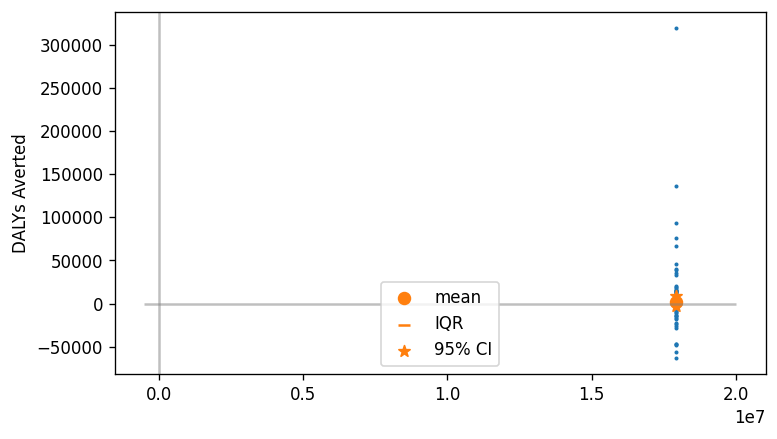

In [83]:
p = results_icers.loc[results_icers.location_id==214].loc[results_icers.vehicle=='oil'].loc[results_icers.nutrient=='all']
p = p.set_index([c for c in p.columns if 'draw' not in c]).stack().reset_index()
f, ax = plt.subplots(figsize=(7, 4), dpi=120)
plt.scatter(p.ten_year_cost * 1_000_000, p[0], s=2)
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].mean(), s=50, label='mean')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.25), color='tab:orange', s=50, label='IQR', marker='_')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.75), color='tab:orange', s=50, marker='_')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.025), s=50,  color='tab:orange', label='95% CI', marker="*")
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.975), s=50,  color='tab:orange', marker="*")
plt.hlines(0, -500_000, 20_000_000, color='grey', alpha=0.5)
#plt.semilogy()
#plt.ylim(-50000,50000)
plt.axvline(0, color='grey', alpha=0.5)
plt.ylabel('DALYs Averted')
plt.xlabel('')
plt.legend()

(-5000.0, 15000.0)

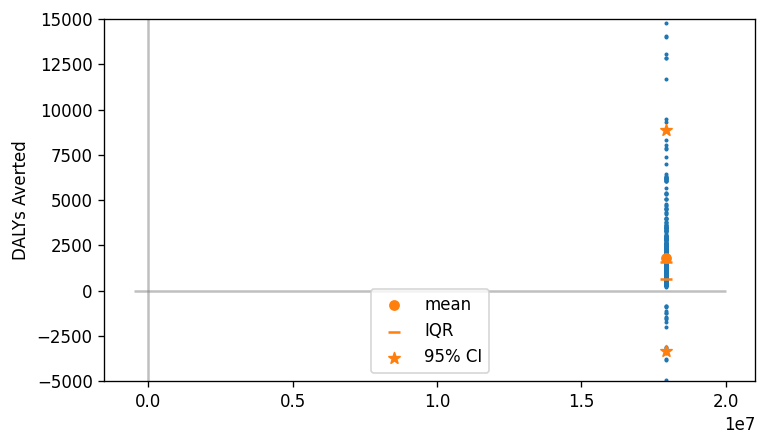

In [87]:
p = results_icers.loc[results_icers.location_id==214].loc[results_icers.vehicle=='oil'].loc[results_icers.nutrient=='all']
p = p.set_index([c for c in p.columns if 'draw' not in c]).stack().reset_index()
f, ax = plt.subplots(figsize=(7, 4), dpi=120)
plt.scatter(p.ten_year_cost * 1_000_000, p[0], s=2)
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].mean(), s=30, label='mean')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.25), color='tab:orange', s=50, label='IQR', marker='_')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.75), color='tab:orange', s=50, marker='_')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.025), s=50,  color='tab:orange', label='95% CI', marker="*")
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.975), s=50,  color='tab:orange', marker="*")
plt.hlines(0, -500_000, 20_000_000, color='grey', alpha=0.5)
#plt.semilogy()
#plt.ylim(-50000,50000)
plt.axvline(0, color='grey', alpha=0.5)
plt.ylabel('DALYs Averted')
plt.xlabel('')
plt.legend()
plt.ylim(-5000,15000)

In [ ]:
p = results_icers.loc[results_icers.location_id==214].loc[results_icers.vehicle=='oil'].loc[results_icers.nutrient=='all']
p = p.set_index([c for c in p.columns if 'draw' not in c]).stack().reset_index()
f, ax = plt.subplots(figsize=(7, 4), dpi=120)
plt.scatter(p.ten_year_cost * 1_000_000, p[0], s=2)
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].mean(), s=50, label='mean')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.25), color='tab:orange', s=50, label='IQR', marker='_')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.75), color='tab:orange', s=50, marker='_')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.025), s=50,  color='tab:orange', label='95% CI', marker="*")
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.975), s=50,  color='tab:orange', marker="*")
plt.hlines(0, -500_000, 20_000_000, color='grey', alpha=0.5)
#plt.semilogy()
#plt.ylim(-50000,50000)
plt.axvline(0, color='grey', alpha=0.5)
plt.ylabel('DALYs Averted')
plt.xlabel('')
plt.legend()
plt.ylim(-50000,50000)

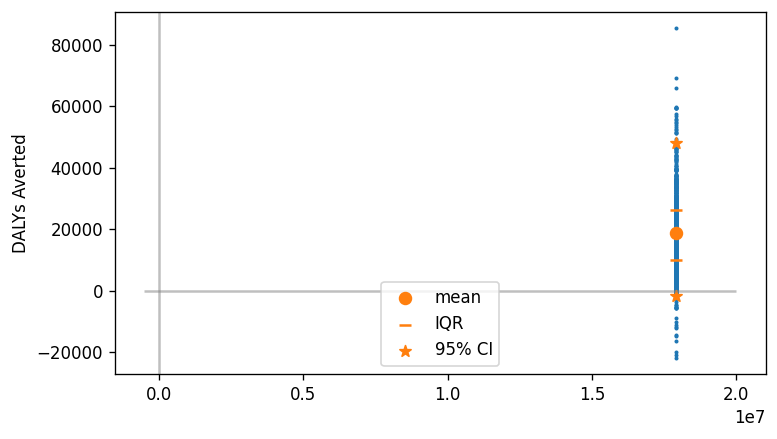

In [81]:
p = results_icers.loc[results_icers.location_id==214].loc[results_icers.vehicle=='oil'].loc[results_icers.nutrient=='all']
p = p.set_index([c for c in p.columns if 'draw' not in c]).stack().reset_index()
f, ax = plt.subplots(figsize=(7, 4), dpi=120)
plt.scatter(p.ten_year_cost * 1_000_000, p[0], s=2)
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].mean(), s=50, label='mean')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.25), color='tab:orange', s=50, label='IQR', marker='_')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.75), color='tab:orange', s=50, marker='_')
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.025), s=50,  color='tab:orange', label='95% CI', marker="*")
plt.scatter(p.ten_year_cost.mean() * 1_000_000, p[0].quantile(0.975), s=50,  color='tab:orange', marker="*")
plt.hlines(0, -500_000, 20_000_000, color='grey', alpha=0.5)
#plt.semilogy()
#plt.ylim(-50000,50000)
plt.axvline(0, color='grey', alpha=0.5)
plt.ylabel('DALYs Averted')
plt.xlabel('')
plt.legend()

In [63]:
p[0].quantile(0.025)

-1621.147801123471

In [ ]:
p['quad'] = np.where(p[0] > 0, )

In [39]:
p.head()

,coverage_level,location_id,location_name,measure,nutrient,vehicle,year,five_year_cost,ten_year_cost,level_9,0
0,0.8,214,Nigeria,counts_averted,all,oil,2025,17.29,17.915,draw_0,584.999678
1,0.8,214,Nigeria,counts_averted,all,oil,2025,17.29,17.915,draw_1,585.756495
2,0.8,214,Nigeria,counts_averted,all,oil,2025,17.29,17.915,draw_10,1750.115792
3,0.8,214,Nigeria,counts_averted,all,oil,2025,17.29,17.915,draw_100,1019.026244
4,0.8,214,Nigeria,counts_averted,all,oil,2025,17.29,17.915,draw_101,2582.414312


In [26]:
results_icers.loc[results_icers.vehicle=='wheat flour'].loc[results_icers.nutrient=='all']

,coverage_level,location_id,location_name,measure,nutrient,vehicle,year,50%,25%,75%,five_year_cost,ten_year_cost,ten_year_50%,five_year_50%,ten_year_25%,five_year_25%,ten_year_75%,five_year_75%
18,0.8,168,Angola,counts_averted,all,wheat flour,2025,7871.794299,5833.848394,10081.578538,0.20,0.14,17.785018,25.407168,23.997881,34.282687,13.886714,19.838163
32,0.8,171,Democratic Republic of the Congo,counts_averted,all,wheat flour,2025,1519.191997,1138.631407,1937.079091,0.16,0.12,78.989358,105.319144,105.389680,140.519574,61.948942,82.598589
46,0.8,179,Ethiopia,counts_averted,all,wheat flour,2025,55992.797618,42998.620966,68542.130407,0.60,0.55,9.822692,10.715664,12.791108,13.953936,8.024262,8.753740
65,0.8,180,Kenya,counts_averted,all,wheat flour,2025,8039.861709,6001.232204,10061.118857,0.20,0.15,18.657037,24.876050,24.994867,33.326489,14.908879,19.878505
79,0.8,181,Madagascar,counts_averted,all,wheat flour,2025,15955.366847,10846.183091,20588.779041,0.16,0.12,7.520980,10.027974,11.063800,14.751733,5.828417,7.771223
93,0.8,184,Mozambique,counts_averted,all,wheat flour,2025,4349.891153,3417.306397,5602.121905,0.22,0.17,39.081438,50.575978,49.746783,64.378190,30.345645,39.270834
112,0.8,189,United Republic of Tanzania,counts_averted,all,wheat flour,2025,26610.569250,20537.373148,33345.563953,0.18,0.14,5.261067,6.764230,6.816841,8.764509,4.198460,5.398019
140,0.8,196,South Africa,counts_averted,all,wheat flour,2025,2530.492648,1821.263731,3312.400967,0.24,0.20,79.035993,94.843192,109.813860,131.776632,60.379164,72.454996
154,0.8,201,Burkina Faso,counts_averted,all,wheat flour,2025,34774.964877,24601.487693,46588.337895,0.18,0.13,3.738322,5.176138,5.284233,7.316631,2.790398,3.863628
168,0.8,202,Cameroon,counts_averted,all,wheat flour,2025,21618.665694,14205.880805,30072.936365,0.16,0.11,5.088196,7.401012,7.743272,11.262941,3.657774,5.320398


In [27]:
icers = results_icers.copy()
for col in ['50%','25%','75%']:
    icers[f'{col}'] = icers[f'{col}'].map('{:,.0f}'.format)

icers['value'] =  (icers['50%'].astype(str).str.split('.', expand=True)[0]
                                            +'\r\n('
                                            +icers['25%'].astype(str).str.split('.', expand=True)[0]
                                            +', '
                                            +icers['75%'].astype(str).str.split('.', expand=True)[0]
                                            +')')
icers['descrip'] = icers.nutrient.str.capitalize().str.replace('Vitamin a','Vitamin A') + ' fortified ' + icers.vehicle + ' cost per DALY averted (US dollars), median and IQR'
icers = icers.filter(['value','descrip','location_id','location_name'])
icers = icers.pivot_table(index=['location_id','location_name'],
                                     columns='descrip', 
                                     values='value',
                                     aggfunc=lambda x: ' '.join(x))   
icers = icers.replace(np.nan, 'Not modeled').reset_index()
icers

descrip,location_id,location_name,"All fortified industry oil cost per DALY averted (US dollars), median and IQR","All fortified industry wheat cost per DALY averted (US dollars), median and IQR","All fortified maize flour cost per DALY averted (US dollars), median and IQR","All fortified oil cost per DALY averted (US dollars), median and IQR","All fortified wheat flour cost per DALY averted (US dollars), median and IQR","Folic acid fortified industry wheat cost per DALY averted (US dollars), median and IQR","Folic acid fortified maize flour cost per DALY averted (US dollars), median and IQR","Folic acid fortified wheat flour cost per DALY averted (US dollars), median and IQR",...,"Iron fortified maize flour cost per DALY averted (US dollars), median and IQR","Iron fortified wheat flour cost per DALY averted (US dollars), median and IQR","Vitamin A fortified industry oil cost per DALY averted (US dollars), median and IQR","Vitamin A fortified industry wheat cost per DALY averted (US dollars), median and IQR","Vitamin A fortified maize flour cost per DALY averted (US dollars), median and IQR","Vitamin A fortified oil cost per DALY averted (US dollars), median and IQR","Vitamin A fortified wheat flour cost per DALY averted (US dollars), median and IQR","Zinc fortified industry wheat cost per DALY averted (US dollars), median and IQR","Zinc fortified maize flour cost per DALY averted (US dollars), median and IQR","Zinc fortified wheat flour cost per DALY averted (US dollars), median and IQR"
0,6,China,Not modeled,"136,154\r\n(95,307, 177,011)",Not modeled,Not modeled,"146,327\r\n(97,199, 198,830)","17,188\r\n(14,656, 20,519)",Not modeled,"19,166\r\n(15,263, 23,502)",...,Not modeled,"125,563\r\n(80,223, 172,645)",Not modeled,"1,857\r\n(1,280, 2,502)",Not modeled,Not modeled,"2,058\r\n(1,323, 2,852)","30\r\n(11, 57)",Not modeled,"33\r\n(12, 63)"
1,11,Indonesia,"4,549\r\n(2,750, 6,467)","5,832\r\n(4,069, 7,735)",Not modeled,"5,188\r\n(3,137, 7,327)",Not modeled,"1,205\r\n(899, 1,552)",Not modeled,Not modeled,...,Not modeled,Not modeled,"4,549\r\n(2,750, 6,467)",Not modeled,Not modeled,"5,188\r\n(3,137, 7,327)",Not modeled,"34\r\n(17, 60)",Not modeled,Not modeled
2,15,Myanmar,"2,193\r\n(1,433, 3,094)","3,386\r\n(2,515, 4,390)",Not modeled,"269\r\n(130, 434)","2,958\r\n(2,054, 3,837)","815\r\n(608, 1,051)",Not modeled,"701\r\n(513, 942)",...,Not modeled,"2,048\r\n(1,335, 2,800)","2,193\r\n(1,433, 3,094)","141\r\n(92, 203)",Not modeled,"269\r\n(130, 434)","123\r\n(78, 180)","4\r\n(2, 8)",Not modeled,"4\r\n(2, 7)"
3,20,Viet Nam,"125\r\n(74, 186)","13,428\r\n(9,337, 18,194)",Not modeled,"172\r\n(76, 321)","6,802\r\n(4,460, 9,633)","1,747\r\n(1,264, 2,532)",Not modeled,"884\r\n(617, 1,307)",...,Not modeled,"5,627\r\n(3,454, 8,375)","125\r\n(74, 186)","251\r\n(169, 354)",Not modeled,"172\r\n(76, 321)","124\r\n(76, 185)","12\r\n(6, 22)",Not modeled,"6\r\n(3, 12)"
4,141,Egypt,"671\r\n(441, 944)",Not modeled,Not modeled,"741\r\n(484, 1,038)",Not modeled,Not modeled,Not modeled,Not modeled,...,Not modeled,Not modeled,"671\r\n(441, 944)",Not modeled,Not modeled,"741\r\n(484, 1,038)",Not modeled,Not modeled,Not modeled,Not modeled
5,161,Bangladesh,"1,609\r\n(1,056, 2,197)","64,143\r\n(45,457, 83,001)",Not modeled,"1,650\r\n(1,110, 2,287)","74,467\r\n(53,560, 95,947)","9,225\r\n(6,409, 13,572)",Not modeled,"10,848\r\n(7,457, 15,588)",...,Not modeled,"61,245\r\n(42,455, 80,117)","1,609\r\n(1,056, 2,197)","903\r\n(599, 1,225)",Not modeled,"1,650\r\n(1,110, 2,287)","1,057\r\n(725, 1,413)","105\r\n(57, 175)",Not modeled,"123\r\n(67, 204)"
6,163,India,"54,921\r\n(36,672, 75,362)","413,033\r\n(291,764, 524,876)",Not modeled,"59,932\r\n(40,104, 83,699)","23,219\r\n(17,287, 29,268)","37,210\r\n(28,728, 50,400)",Not modeled,"1,603\r\n(1,259, 2,167)",...,Not modeled,"16,509\r\n(11,705, 21,296)","54,921\r\n(36,672, 75,362)","18,115\r\n(12,471, 25,464)",Not modeled,"59,932\r\n(40,104, 83,699)","4,060\r\n(2,825, 5,527)","2,673\r\n(1,681, 4,070)",Not modeled,"

In [28]:
cost = costs_with_location_ids.copy()
cost['descrip'] = 'Annual ' + cost.vehicle + ' fortification cost (millions of US dollars)'
cost['cost'] = (cost['ten_year_cost'] / 10).round(2)
cost = cost.pivot_table(index=['location_id','location_name'],
                                     columns='descrip', 
                                     values='cost')   
cost = cost.replace(np.nan, 'Not estimated').reset_index()
cost.head()

descrip,location_id,location_name,Annual industry oil fortification cost (millions of US dollars),Annual industry wheat fortification cost (millions of US dollars),Annual maize flour fortification cost (millions of US dollars),Annual oil fortification cost (millions of US dollars),Annual wheat flour fortification cost (millions of US dollars)
0,6,China,Not estimated,51.37,Not estimated,Not estimated,51.37
1,10,Cambodia,Not estimated,0.12,Not estimated,Not estimated,0.12
2,11,Indonesia,24.11,0.19,Not estimated,24.11,0.19
3,15,Myanmar,9.81,0.12,Not estimated,9.81,0.12
4,16,Philippines,11.14,0.26,Not estimated,11.14,0.26


In [29]:
vehicles = ['oil','maize flour','wheat flour']

# print location ids that were excluded due to lack of cost data for each vehicle
print('Location IDs excluded due to lack of cost data for each vehicle')
for vehicle in vehicles:
    exclusions = ([c for c in list(results.loc[results.vehicle == vehicle].location_id.unique())
                     if c not in list(results_icers.loc[results_icers.vehicle == vehicle].location_id.unique())])
    print(f'{vehicle}: {exclusions}')

Location IDs excluded due to lack of cost data for each vehicle
oil: [522, 6, 1.5, '2.5']
maize flour: [141, 171, 179, 181, 184, 201, 202, 213, 214, 522, 1.5, '2.5']
wheat flour: [141, 190, 522, 1.5, '2.5']


In [30]:
l = get_ids('location')
l[l['location_id'].isin([522])].sort_values(by='location_name').location_name.values

array(['Sudan'], dtype=object)

In [31]:
def make_cost_per_daly_plots(data, vehicle, nutrient, value_cap, uncertainty=True):
    df = (data
                .loc[data.vehicle == vehicle]
                .loc[data.nutrient == nutrient]
                .loc[data['ten_year_50%'] <= value_cap]
                .sort_values(by='ten_year_50%'))
    
    f, ax = plt.subplots(figsize=(7, 4), dpi=120)
    colors = ['tab:red', 'tab:orange', 'tab:green']

    location_spacer = 0.15
    x_vals = []
    for i in list(range(0, len(df))):
        if uncertainty: 
            plt.plot([location_spacer * i, location_spacer * i],
                     [df['ten_year_25%'].values[i], df['ten_year_75%'].values[i]], c='black')
            plt.scatter([location_spacer * i], df['ten_year_25%'].values[i], s=50, marker='_',
                        c='black')
            plt.scatter([location_spacer * i], df['ten_year_75%'].values[i], s=50, marker='_',
                        c='black')

        x_vals.append(location_spacer * i)
    
    plt.scatter(x_vals, df['ten_year_50%'], s=50)

    plt.hlines(0, 0,
               location_spacer * (len(df)),
               linestyle='dashed', color='grey', alpha=0.5)
    
    plt.plot()
    
    plt.title(f'Cost per DALY Averted by Location\n{nutrient.capitalize()} in {vehicle.capitalize()}\nMedian values and interquartile ranges')
    plt.ylabel('Dollars per DALY Averted')
    
    #df = df.merge(confidence_data.replace('vitamin a','vitamin A'), on=['location_name','nutrient','vehicle'])
    #df['label'] = (np.where(df.score == 5, '***** ',
    #                  np.where(df.score == 4, '**** ',
    #                           np.where(df.score == 3, '*** ',
    #                                    np.where(df.score == 2, '** ',
    #                                             np.where(df.score == 1, '* ', '')))))
    #               + df.location_name)

    x_ticks = []
    for x in list(range(0, len(df))):
        x_ticks.append(location_spacer * x)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(df.location_name.values)
    plt.semilogy()
    plt.yticks(ticks=[1,10,100,1_000,10_000,100_000,1_000_000], labels=['1','10','100','1,000','10,000','100,000','1,000,000'])
    plt.xticks(rotation=90)

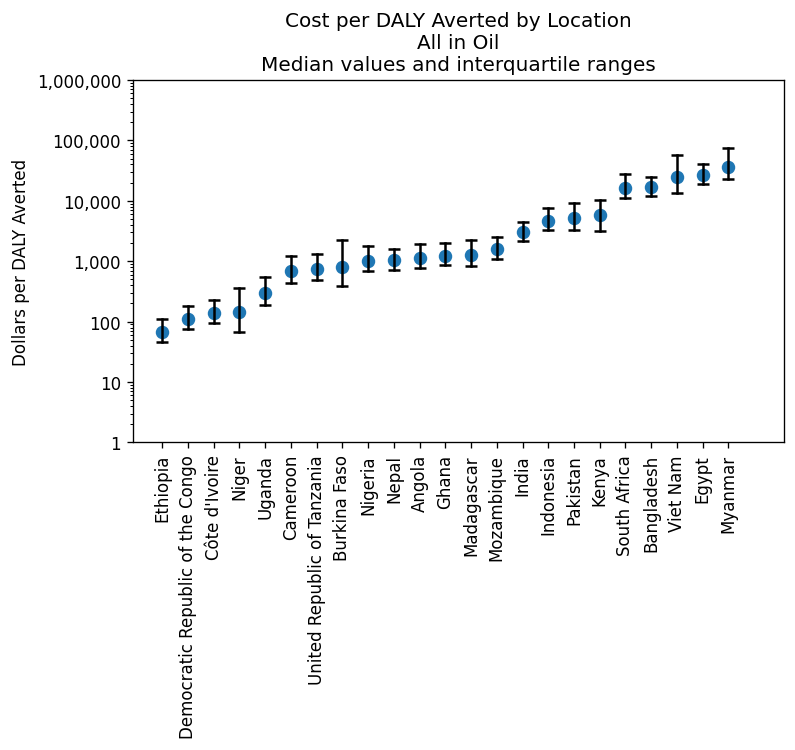

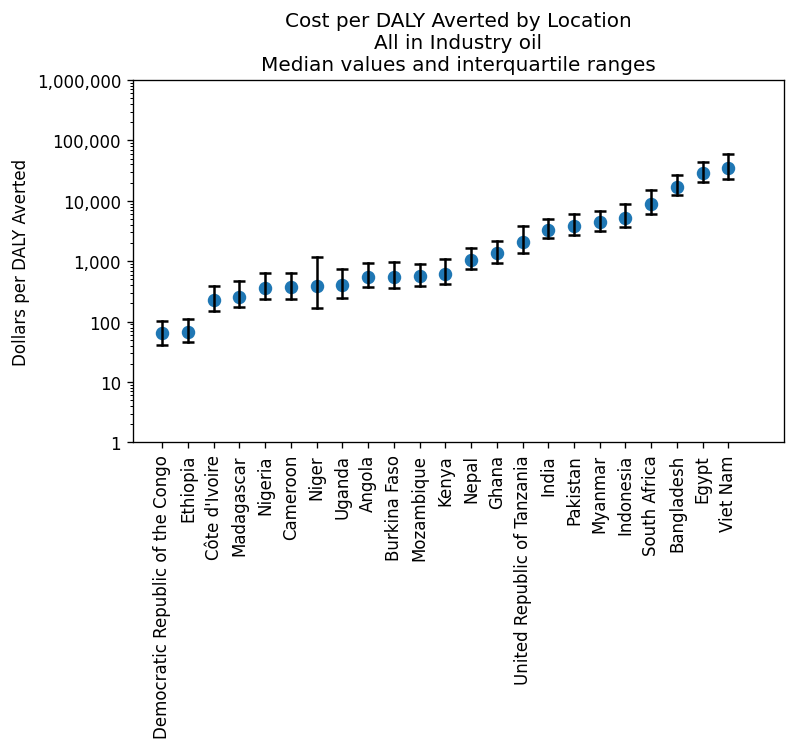

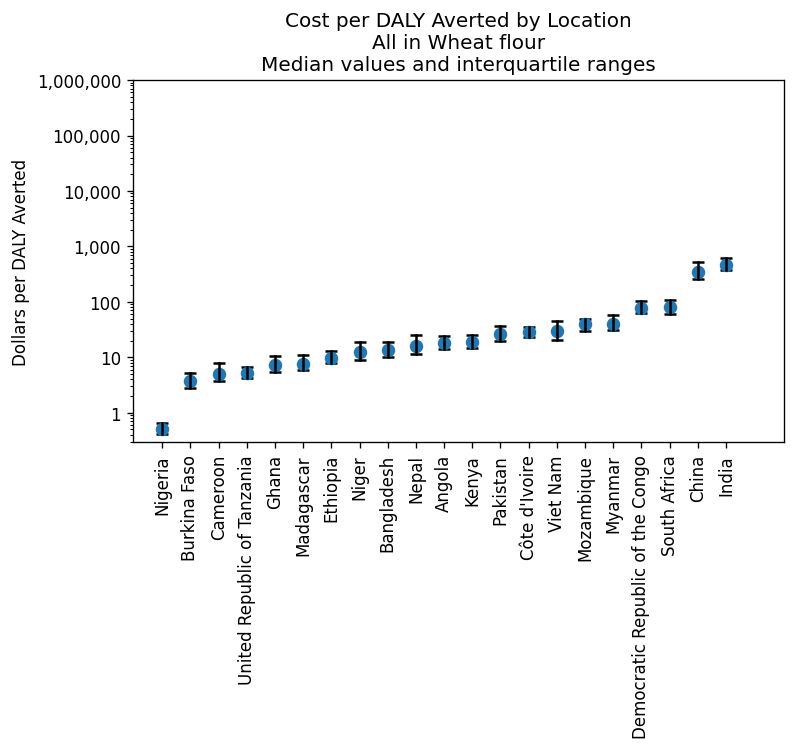

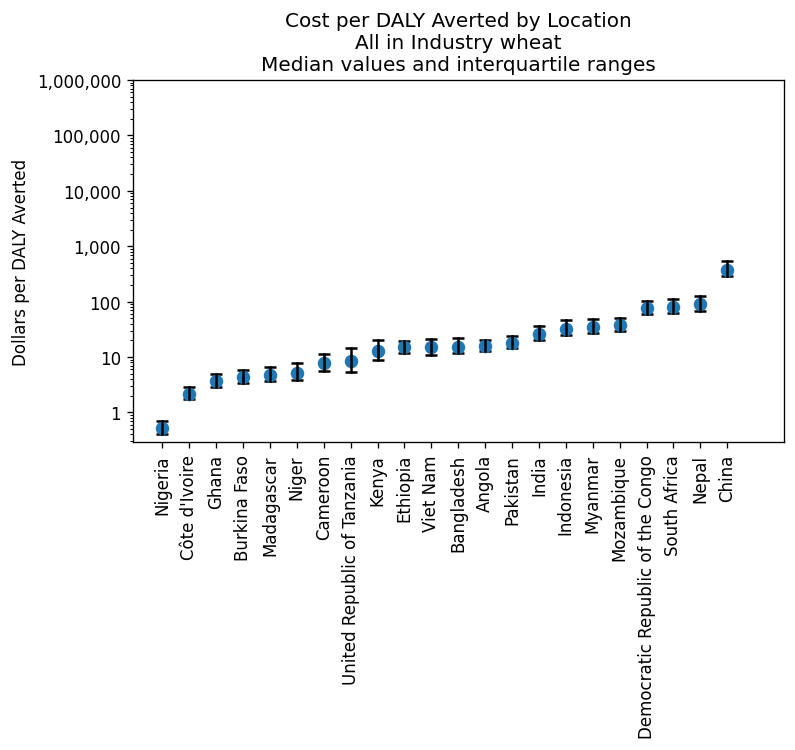

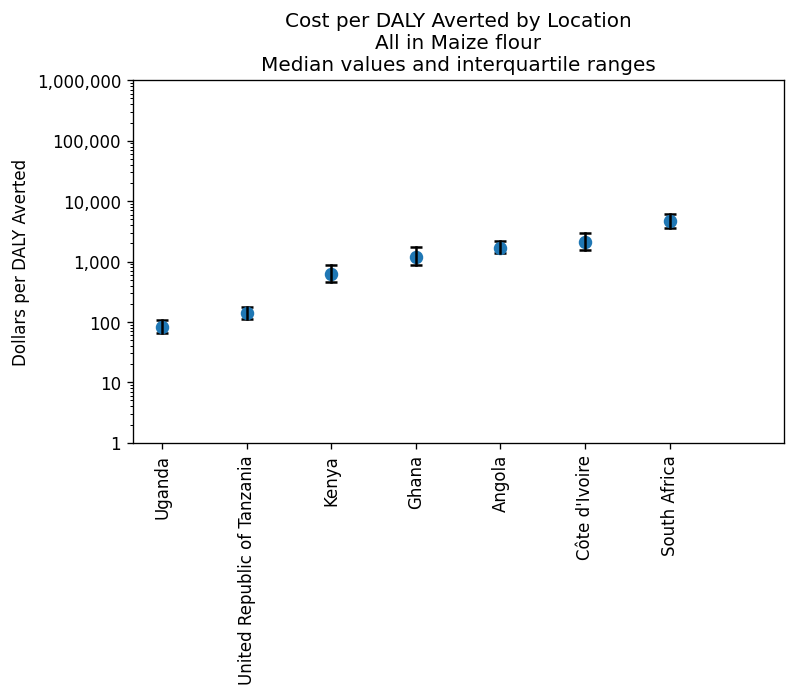

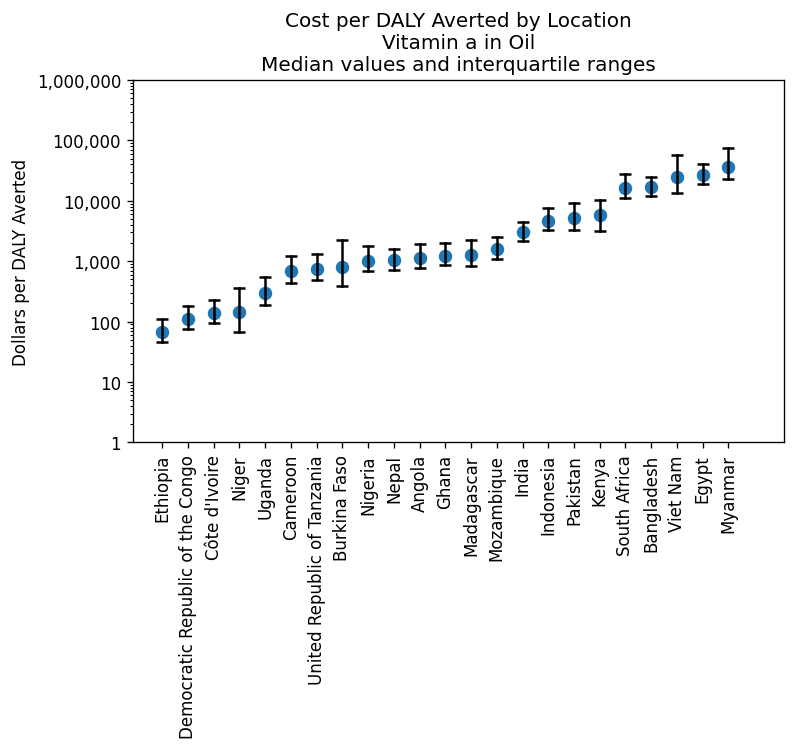

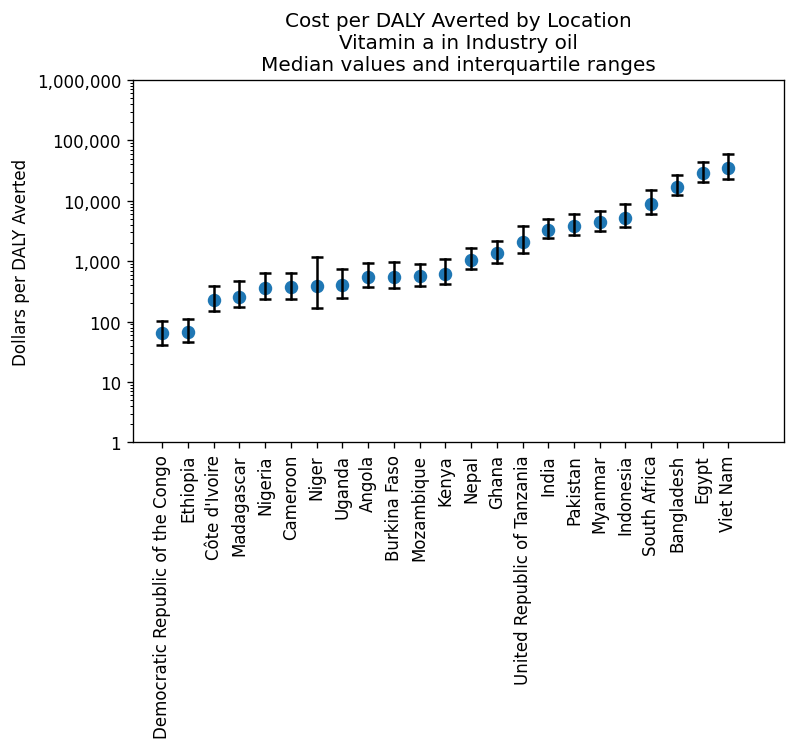

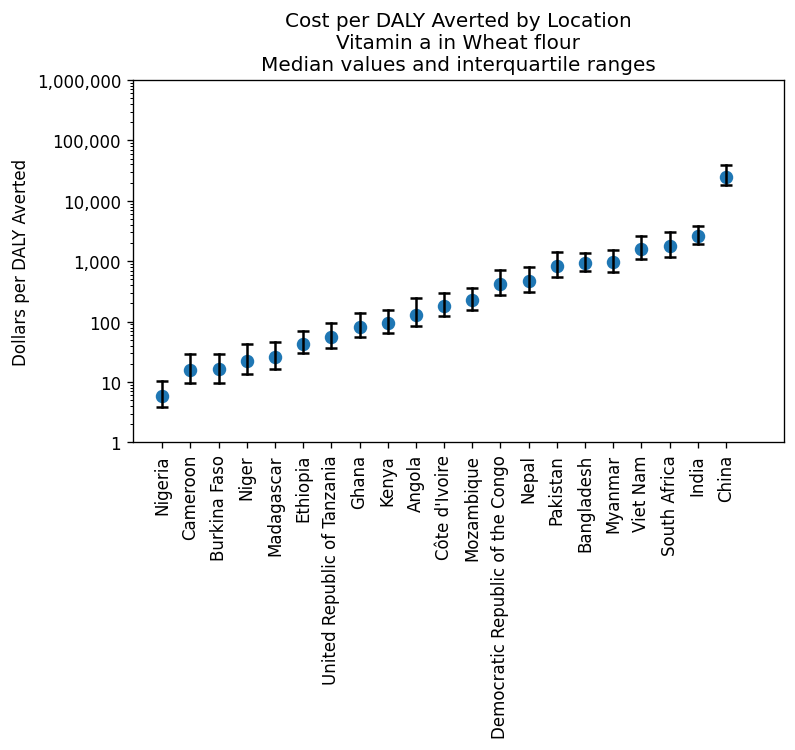

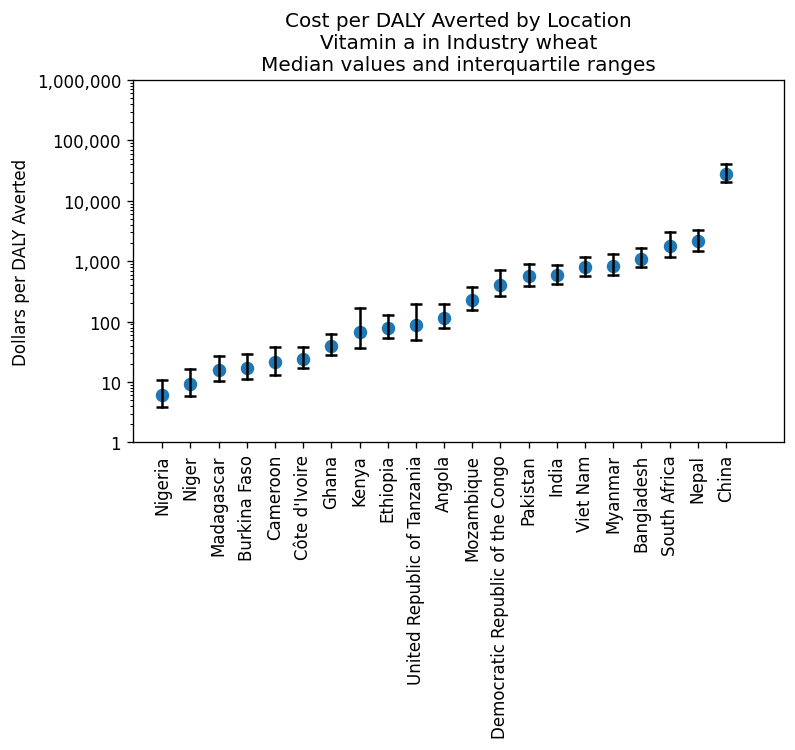

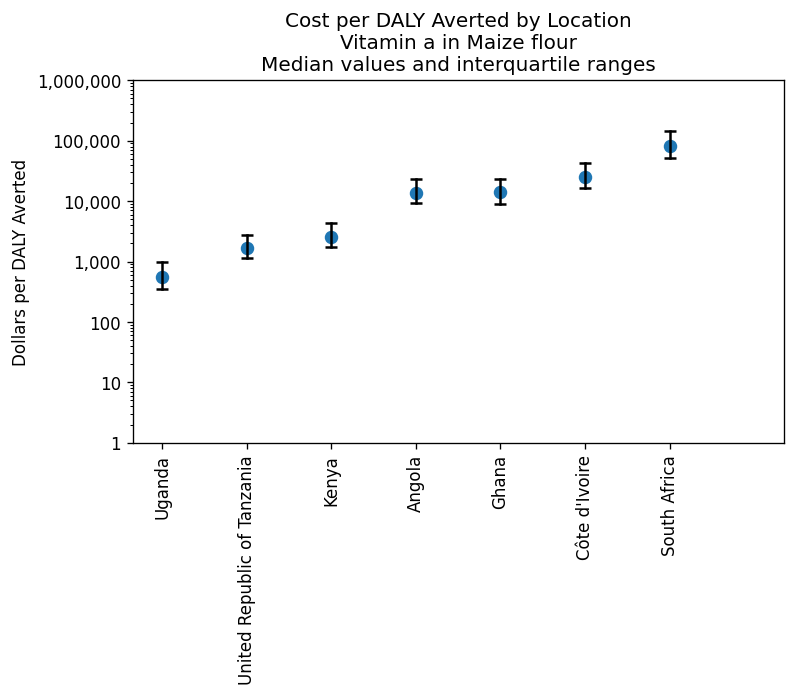

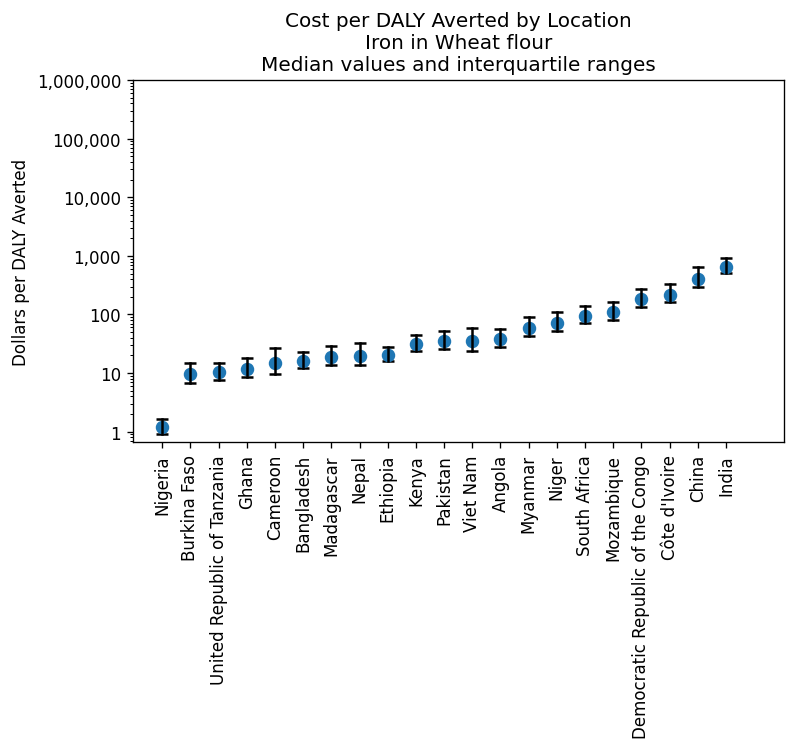

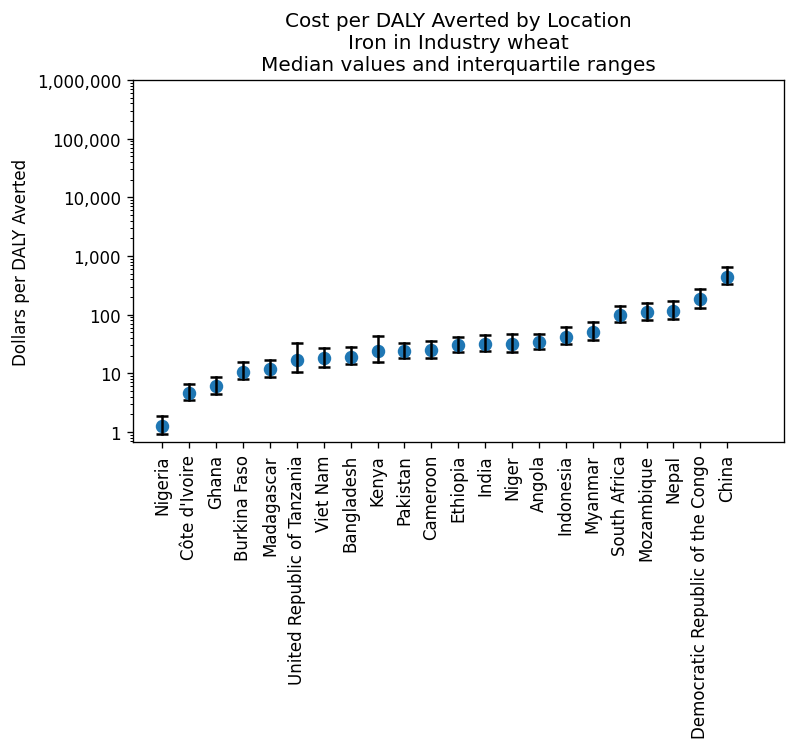

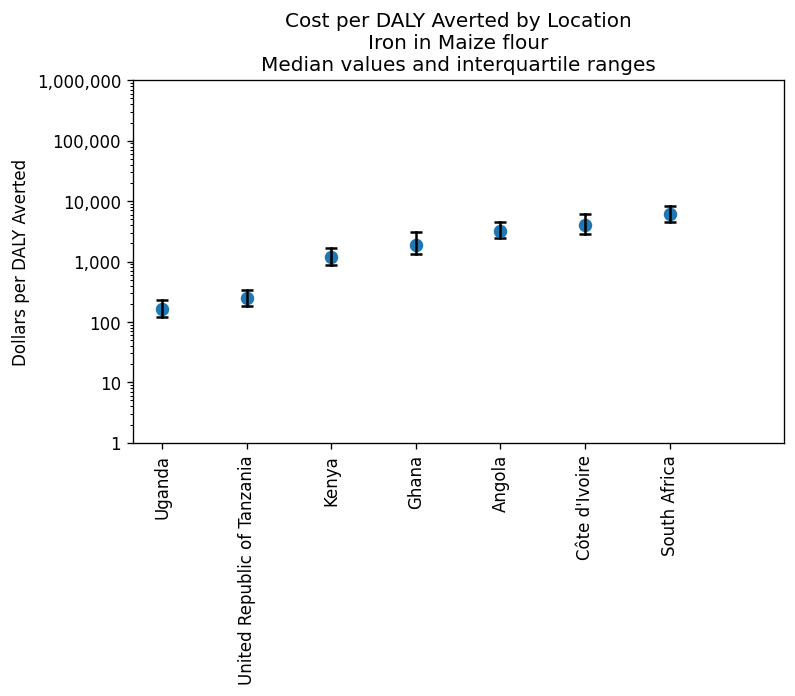

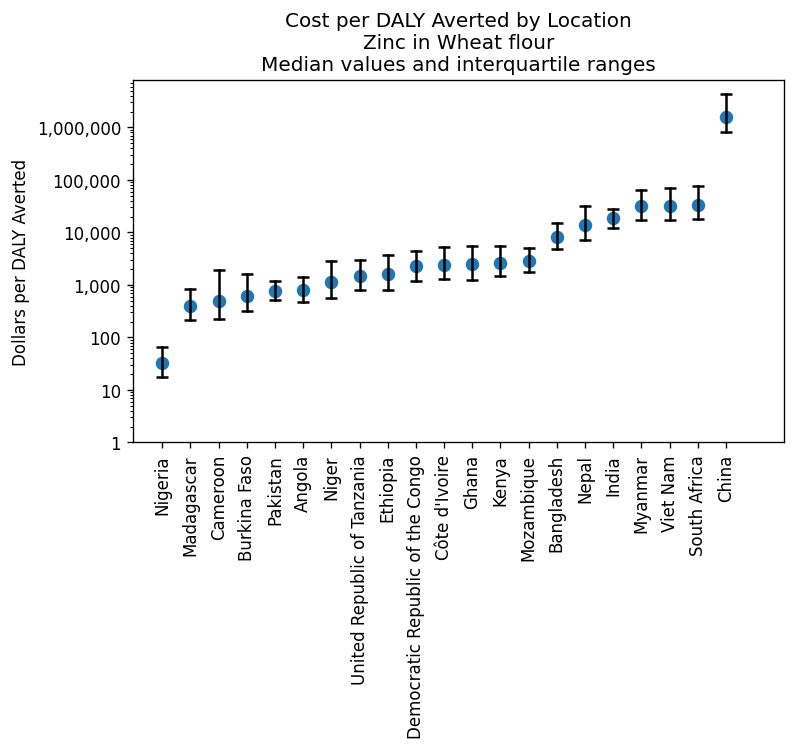

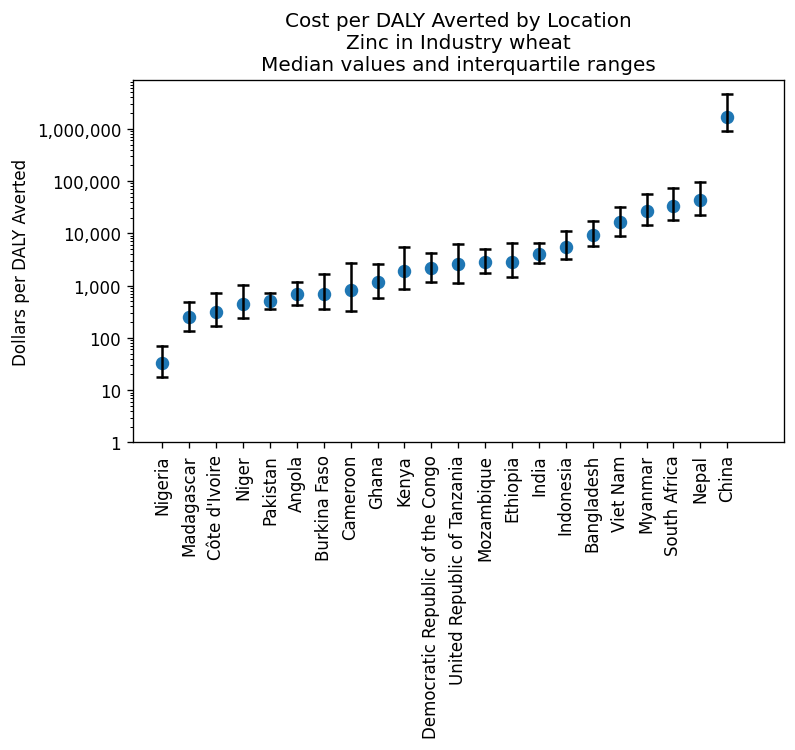

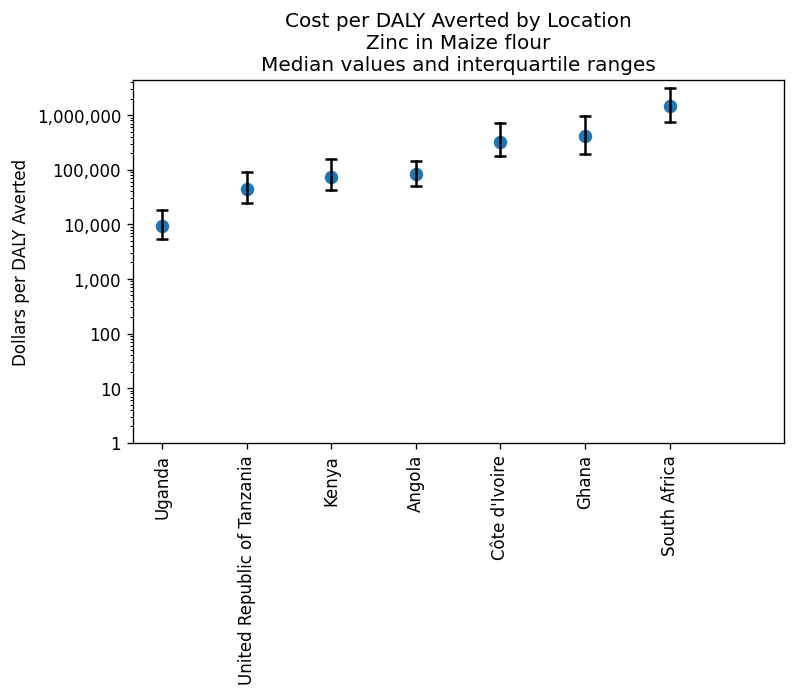

In [33]:
with PdfPages('results_plots/costs_per_daly_by_nutrient_vehicle_pair.pdf') as pdf:

    nutrients = ['all','vitamin A','iron','zinc']
    for nutrient in nutrients:
        if nutrient == 'vitamin A' or nutrient == 'all':
            vehicles = ['oil', 'industry oil','wheat flour','industry wheat','maize flour']
        else:
            vehicles = ['wheat flour','industry wheat','maize flour']
        value_cap = np.inf
        for vehicle in vehicles:
            make_cost_per_daly_plots(results_icers, vehicle, nutrient, value_cap, True)
            pdf.savefig(bbox_inches='tight')

# Final CSV

In [34]:
final_data_all_nutrients = (gbd_data.loc[gbd_data.location_id!=1]
                                .merge(coverage, on=[c for c in coverage.columns if c in ['location_name','location_id']])
                                .merge(model_results_for_table.reset_index(), on=[c for c in model_results_for_table.reset_index().columns if c in ['location_name','location_id']])
                                #.merge(anemia.reset_index(), on='location_id', how='left')
                                .merge(ntds.reset_index(), on='location_id', how='left')
                                #.merge(cost, on=[c for c in cost.columns if c in ['location_name','location_id']], how='left')
                                #.merge(icers, on=[c for c in icers.columns if c in ['location_name','location_id']], how='left')
                                .rename(columns={'location_name':'Location name'})
                                .set_index(['Location name'])
                                .replace(np.nan, 'Not modeled')
                                .drop(columns='location_id'))

assert len(final_data_all_nutrients) == 25, 'Error: different than expected number of locations'

final_data_zinc = final_data_all_nutrients[[c for c in final_data_all_nutrients.columns if 'Zinc' in c 
                                    or 'zinc' in c
                                    or 'fortifiable wheat flour' in c
                                    or 'fortifiable maize flour' in c]].reset_index()
final_data_vitamin_a = final_data_all_nutrients[[c for c in final_data_all_nutrients.columns if 'itamin' in c 
                                    or 'oil' in c
                                    or 'Oil' in c]].reset_index()
final_data_iron = final_data_all_nutrients[[c for c in final_data_all_nutrients.columns if 'Iron' in c 
                                    or 'iron' in c
                                    or 'nemia' in c
                                    or 'fortifiable wheat flour' in c
                                    or 'fortifiable maize flour' in c]].reset_index()
final_data_folic_acid = final_data_all_nutrients[[c for c in final_data_all_nutrients.columns if 'olic acid' in c 
                                    or 'fortifiable wheat flour' in c
                                    or 'eural' in c       
                                    or 'fortifiable maize flour' in c]].reset_index()

final_data_all_nutrients.to_csv('results_plots/final_data_all_nutrients.csv')
final_data_zinc.to_csv('results_plots/final_data_zinc.csv')
final_data_vitamin_a.to_csv('results_plots/final_data_vitamin_a.csv')
final_data_iron.to_csv('results_plots/final_data_iron.csv')
final_data_folic_acid.to_csv('results_plots/final_data_folic_acid.csv')

final_data_vitamin_a.columns

Index(['Location name',
       'Baseline Prevalence of Vitamin A deficiency in age group Under 5 (per 100)',
       'Baseline Number in age group Under 5 with Vitamin A deficiency (1000s)',
       'Baseline DALYs attributable to Vitamin A deficiency in age group Under 5 (1000s)',
       'Baseline DALYs attributable to Vitamin A deficiency per 100,000 person-years in age group Under 5',
       'Percent of population eating vitamin a fortified industry oil at baseline',
       'Percent of population eating vitamin a fortified industry oil: 20% scale-up',
       'Percent of population eating vitamin a fortified industry oil: 50% scale-up',
       'Percent of population eating vitamin a fortified industry oil: 80% scale-up',
       'Percent of population eating vitamin a fortified industry wheat at baseline',
       ...
       'zero oil (all nutrients) DALYs averted per 100,000 person-years: 50% scale-up',
       'zero oil (all nutrients) DALYs averted per 100,000 person-years: 80% scale-u